## Google Colab Arbeitplatz vorbereiten

In [ ]:
!git clone https://github.com/edadunashvili/KaFo.git

In [ ]:
cd /content/KaFo

In [ ]:
!pip install pymystem3

In [ ]:
!pip install mglearn

In [ ]:
!pip install --upgrade joblib==1.1.0

In [ ]:
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [ ]:
# from pymystem3 import Mystem
# m = Mystem()
# def lemmatize_sentence(text):
#     lemmas = m.lemmatize(text)
#     return "".join(lemmas).strip()

# erthaos - synthetische Episode

In [8]:
maerchen="" 
import xml.etree.ElementTree as ET
root_node = ET.parse('gesamt_märchen_f.xml').getroot()
inhalt_voll=""
never_saved = True
for schirm in root_node.findall (".//{http://www.tei-c.org/ns/1.0}TEI"):
    for genre in schirm.findall(".//{http://www.tei-c.org/ns/1.0}term"):
        for ganze in schirm.findall(".//{http://www.tei-c.org/ns/1.0}text"):
            if 'zyx_' in ganze.attrib['{http://www.w3.org/XML/1998/namespace}id']:
                for body in ganze.findall(".//{http://www.tei-c.org/ns/1.0}body"):
                    for absatz in body.findall(".//{http://www.tei-c.org/ns/1.0}p"):
                        for phrase in absatz.findall(".//{http://www.tei-c.org/ns/1.0}*"):
                            labelg=genre.text
                            labell = phrase.attrib['{www.dglab.uni-jena.de/vmf/l}ana']
                            labela = phrase.attrib['{www.dglab.uni-jena.de/vmf/a}ana']
                            labelh = phrase.attrib['{www.dglab.uni-jena.de/vmf/h}ana']
                            quelle= ganze.attrib['{http://www.w3.org/XML/1998/namespace}id']
                            inhalt = (phrase.text.lower().strip().replace('|','').replace(':','').replace("ä","ae")
                                  .replace("ü","ue").replace("ö","oe").replace("ß","ss").replace(",","")
                                  .replace("«","").replace("»","").replace(".","").replace('=',' ').replace(";","")
                                  .replace('"',"").replace("?","").replace("!","").replace("á","a").replace(",","")
                                  .replace("\t"," ").replace("'","").replace("‹","").replace("›","").replace("-"," ")
                                  .replace("'('","").replace("')'","").replace('>','').replace("    "," ")
                                  .replace("   "," ").replace("  "," ").replace('–','').replace('—','').replace('<','')
                                  .replace("Â", "A").replace("ø", "oe").replace('“','').replace('„','').replace('(','')
                                  .replace(')','').replace('*','').replace("\n","\n")
                                  .replace("'''",""))
                            if labela.startswith('m') or labela.startswith('e'):# and labelg!='Novelle' and labelg!='Tiermärchen':
                                maerchen += quelle+','+labela+':'+labell+':'+labelh+','+inhalt+',0'+'\n'                                             
with open("text.csv", 'w', encoding='utf-8') as f:
    f.write('quelle,index_string,episode,index_binar\n')
    f.write('000:ballast,ballast,ballast,0')
    f.write('\n')
    f.write(maerchen)

In [9]:
custom_stop_word_list=['ассалам', 'ваалейкум', 'алейкум', 'салам']
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
NLTK_stop_words_list=stopwords.words('russian')
ru = custom_stop_word_list + NLTK_stop_words_list

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elguj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
import pandas as pd
from collections import Counter
df = pd.read_csv('text.csv',  encoding='utf-8')
indexliste=Counter(df.index_string)
print(indexliste, sep='\n')

Counter({'e1641:0:': 28, 'm554:AS:Sorge_um_Schutzbedürftigen:': 27, 'm513A:AS:Auslösen_von_Sympathie:': 26, 'm513A:ES:Begleiter_gewinnen:': 26, 'm554:ES:Mittel_zum_Herbeirufen_erhalten:': 25, 'e655:0:': 19, 'm554:AS:Begnadigen_der_potenziellen_Beute:': 17, 'm545B:EB:Aneignen_des_Zaubermittels_oder_des_Guten:': 17, 'm301:AS:Provozieren:': 16, 'm301:EK:Provozieren:': 16, 'm552:ES:Ungewünschte_Verlobung:': 16, 'm300:AB:Erpressen_Existenzbedrohung_beheben:': 15, 'm530:EB:Reiterkünste_beweisen:': 15, 'm707:ES:Handlungsanweisungen_erhalten:': 15, 'm545B:AB:Vortäuschen:': 15, 'm300:EB:Mut_zeigen:': 15, 'm471:EF:Frage_geklärt:': 15, 'm551:EK:Heilmittel_beschaffen:': 14, 'm563:AB:Zaubermittel_Ausrüstung_oder_die_Waffe_ausprobieren:': 14, 'm563:EK:Aneignen_des_Zaubermittels_oder_des_Guten:': 14, 'm329:AB:Wetten_Versteckwette:HF': 14, 'm327B:AB:Bedrohung_gefressen_zu_werden:': 14, 'm327B:EB:Vortäuschen:': 14, 'm460A:EK:Ablehnen_des_Glücksversprechens:': 14, 'm301:EB:Zweikampf_bzw_Turnier:': 13, '

In [11]:
gesep_1 = "e1920:0"
#gesep_2 = "m726:EF:Frage_geklärt:HD_ST"

In [12]:
#0 für 1 gesep
for i, gesuchte_episode in enumerate(df.index_string):
    if gesep_1 in gesuchte_episode:
        print(i, gesuchte_episode)
        df.index_binar.iloc[i]=1
df.to_csv('text_lab.csv', encoding='utf-8', index=False)

3839 e1920:0:
3840 e1920:0:
3841 e1920:0:
3842 e1920:0:
3843 e1920:0:


C:\Users\elguj\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [23]:
#0 für 2 gesep
for i, gesuchte_episode in enumerate(df.index_string):
    if gesep_1 in gesuchte_episode or gesep_2 in gesuchte_episode:
        print(i, gesuchte_episode)
        df.index_binar.iloc[i]=1
df.to_csv('text_lab.csv', encoding='utf-8', index=False)

NameError: name 'gesep_2' is not defined

In [459]:
#0,-1 für 2 gesep
for i, gesuchte_episode in enumerate(df.index_string):
    if gesep_1 in gesuchte_episode or gesep_2 in gesuchte_episode:
        print(i, gesuchte_episode)
        if i==0:
            df.index_binar.iloc[i:i+1]=1
        elif i==len(df.index_binar)-1:
            df.index_binar.iloc[i-1:i]=1
        else:
            df.index_binar.iloc[i-1:i+1]=1   
df.to_csv('text_lab.csv', encoding='utf-8', index=False)

1284 m726:AF:Von_dem_Alte:HD_ST
1285 m726:EF:Frage_geklärt:HD_ST


In [460]:
#0,-1 für 1 gesep
for i, gesuchte_episode in enumerate(df.index_string):
    if gesep_1 in gesuchte_episode:
        print(i, gesuchte_episode)
        if i==0:
            df.index_binar.iloc[i:i+1]=1
        elif i==len(df.index_binar)-1:
            df.index_binar.iloc[i-1:i]=1
        else:
            df.index_binar.iloc[i-1:i+1]=1   
df.to_csv('text_lab.csv', encoding='utf-8', index=False)

1284 m726:AF:Von_dem_Alte:HD_ST


In [7]:
#-1,0,1 für 1 gesep
for i, gesuchte_episode in enumerate(df.index_string):
    if gesep_1 in gesuchte_episode:
        print(i, gesuchte_episode)
        if i==0:
            df.index_binar.iloc[i:i+2]=1
        elif i==len(df.index_binar)-1:
            df.index_binar.iloc[i-1:i+1]=1
        else:
            df.index_binar.iloc[i-1:i+2]=1   
df.to_csv('text_lab.csv', encoding='utf-8', index=False)

2528 m328:AB:Truhe_anfertigen:


In [382]:
#-1,0,1 für 2 gesep
for i, gesuchte_episode in enumerate(df.index_string):
    if gesep_1 in gesuchte_episode or gesep_2 in gesuchte_episode :
        print(i, gesuchte_episode)
        if i==0:
            df.index_binar.iloc[i:i+2]=1
        elif i==len(df.index_binar)-1:
            df.index_binar.iloc[i-1:i+1]=1
        else:
            df.index_binar.iloc[i-1:i+2]=1   
df.to_csv('text_lab.csv', encoding='utf-8', index=False)

In [13]:
df = pd.read_csv('text_lab.csv',  encoding='utf-8')
X_train=(df['episode'])
y_train=(df['index_binar'])
indexliste=Counter(df.index_binar)
print(indexliste, sep='\n')

Counter({0: 3858, 1: 5})


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(TfidfVectorizer(min_df=3, stop_words=ru, ngram_range=(1,1), norm=None), 
                     LogisticRegression())
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}     
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)
print("Bester Score aus der Kreuzvalidierung: {:.2f}".format(grid.best_score_))

Bester Score aus der Kreuzvalidierung: 1.00


In [15]:
import numpy as np
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
max_value = vectorizer.transform(X_train).max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
feature_names = np.array(vectorizer.get_feature_names())
print("Gesamte Anzahl der Wörter: {}".format(len(vectorizer.vocabulary_)))

Gesamte Anzahl der Wörter: 8207


C:\Users\elguj\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


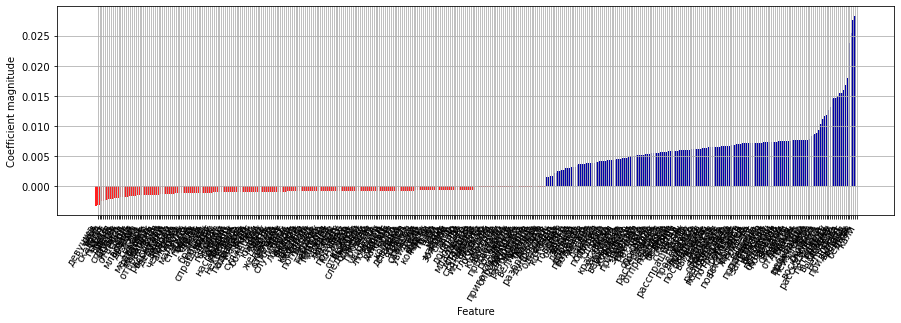

In [16]:
s_zahl = 200
import matplotlib.pyplot as plt
import mglearn
mglearn.tools.visualize_coefficients(
    grid.best_estimator_.named_steps["logisticregression"].coef_,
    feature_names,  n_top_features=s_zahl)
plt.grid()

In [17]:
gio=(grid.best_estimator_.named_steps["logisticregression"].coef_[0])
n_top=np.argsort(gio)
z_top=np.sort(gio)
text_pos=feature_names[n_top[-s_zahl:]]
text_neg=feature_names[n_top[0:s_zahl]]
zahl_pos=gio[n_top[-s_zahl:]]
zahl_neg=gio[n_top[0:s_zahl]]
print("Positive Merkmale:\n{}".format(text_pos))
print ("Negative Merkmale:\n{}".format(text_neg))
print ("Positive coef:\n{}".format(zahl_pos))
print ("Negative coef:\n{}".format(zahl_neg))

Positive Merkmale:
['стальными' 'глядит' 'интересно' 'колотя' 'осле' 'глубиною' 'ослепли'
 'хвосте' 'лай' 'купается' 'убитого' 'вкусное' 'золе' 'прошагали'
 'светало' 'горки' 'поверила' 'мозгу' 'пепле' 'стойбища' 'приготовленной'
 'опрокинутая' 'потушен' 'полянки' 'накормика' 'разбросана' 'нужное'
 'густого' 'сварив' 'великанше' 'погони' 'поляна' 'догнав' 'пленяя'
 'разбрасывая' 'ото' 'дуновенье' 'стал' 'человек' 'однажды' 'очень'
 'сказал' 'который' 'отца' 'дал' 'говорит' 'отцу' 'одного' 'долго' 'одной'
 'землю' 'дальше' 'домой' 'свой' 'обратно' 'приказал' 'подошел' 'замуж'
 'моего' 'эта' 'дня' 'дерево' 'хотел' 'начал' 'положил' 'головы' 'это'
 'сделал' 'руки' 'хочу' 'красавица' 'слова' 'закричал' 'дала' 'просить'
 'вернулась' 'говорил' 'услышал' 'золото' 'такие' 'столько' 'пришлось'
 'поиски' 'отдай' 'заметил' 'пришел' 'рассказ' 'отдать' 'сто' 'шею' 'хана'
 'спокойно' 'большое' 'рассердился' 'таких' 'спустя' 'едва' 'отправиться'
 'поведал' 'дереве' 'воде' 'вернул' 'бедный' 'таки' 'тв

In [18]:
kfz=range(s_zahl)
folgenum=0
for x in kfz:
    folgenum+=1
    vollliste=(zahl_pos[s_zahl-folgenum])+(zahl_neg[s_zahl-folgenum])
    rundliste=(round(vollliste,3))
    print(rundliste, '-', x)

0.028 - 0
0.027 - 1
0.025 - 2
0.023 - 3
0.017 - 4
0.016 - 5
0.015 - 6
0.015 - 7
0.015 - 8
0.014 - 9
0.014 - 10
0.014 - 11
0.014 - 12
0.013 - 13
0.012 - 14
0.011 - 15
0.011 - 16
0.01 - 17
0.01 - 18
0.009 - 19
0.008 - 20
0.008 - 21
0.008 - 22
0.008 - 23
0.007 - 24
0.007 - 25
0.007 - 26
0.007 - 27
0.007 - 28
0.007 - 29
0.007 - 30
0.007 - 31
0.007 - 32
0.007 - 33
0.007 - 34
0.007 - 35
0.007 - 36
0.007 - 37
0.007 - 38
0.007 - 39
0.007 - 40
0.007 - 41
0.007 - 42
0.007 - 43
0.007 - 44
0.007 - 45
0.007 - 46
0.007 - 47
0.007 - 48
0.007 - 49
0.007 - 50
0.007 - 51
0.007 - 52
0.007 - 53
0.007 - 54
0.006 - 55
0.006 - 56
0.006 - 57
0.006 - 58
0.006 - 59
0.006 - 60
0.006 - 61
0.006 - 62
0.006 - 63
0.006 - 64
0.006 - 65
0.006 - 66
0.006 - 67
0.006 - 68
0.006 - 69
0.006 - 70
0.006 - 71
0.006 - 72
0.006 - 73
0.006 - 74
0.006 - 75
0.006 - 76
0.006 - 77
0.006 - 78
0.006 - 79
0.006 - 80
0.005 - 81
0.005 - 82
0.005 - 83
0.005 - 84
0.005 - 85
0.005 - 86
0.005 - 87
0.005 - 88
0.005 - 89
0.005 - 90
0.005 - 91


In [19]:
sw=162

In [20]:
import csv 
import shutil, os
filename ='!_neu' #gesep
tit=(text_pos[s_zahl-sw:s_zahl])
with open (filename+'.csv', 'wt', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerow(tit)


# erthaos - Vorhersage -Episode

In [21]:
maerchen="" 
import xml.etree.ElementTree as ET
root_node = ET.parse('gesamt_märchen_f.xml').getroot()
inhalt_voll=""
never_saved = True
for schirm in root_node.findall (".//{http://www.tei-c.org/ns/1.0}TEI"):
    for genre in schirm.findall(".//{http://www.tei-c.org/ns/1.0}term"):
        for ganze in schirm.findall(".//{http://www.tei-c.org/ns/1.0}text"):
            if 'zyx_' in ganze.attrib['{http://www.w3.org/XML/1998/namespace}id']:
                for body in ganze.findall(".//{http://www.tei-c.org/ns/1.0}body"):
                    for absatz in body.findall(".//{http://www.tei-c.org/ns/1.0}p"):
                        for phrase in absatz.findall(".//{http://www.tei-c.org/ns/1.0}*"):
                            labelg=genre.text
                            labell = phrase.attrib['{www.dglab.uni-jena.de/vmf/l}ana']
                            labela = phrase.attrib['{www.dglab.uni-jena.de/vmf/a}ana']
                            labelh = phrase.attrib['{www.dglab.uni-jena.de/vmf/h}ana']
                            quelle= ganze.attrib['{http://www.w3.org/XML/1998/namespace}id']
                            inhalt = (phrase.text.lower().strip().replace('|','').replace(':','').replace("ä","ae")
                                  .replace("ü","ue").replace("ö","oe").replace("ß","ss").replace(",","")
                                  .replace("«","").replace("»","").replace(".","").replace('=',' ').replace(";","")
                                  .replace('"',"").replace("?","").replace("!","").replace("á","a").replace(",","")
                                  .replace("\t"," ").replace("'","").replace("‹","").replace("›","").replace("-"," ")
                                  .replace("'('","").replace("')'","").replace('>','').replace("    "," ")
                                  .replace("   "," ").replace("  "," ").replace('–','').replace('—','').replace('<','')
                                  .replace("Â", "A").replace("ø", "oe").replace('“','').replace('„','').replace('(','')
                                  .replace(')','').replace('*','').replace("\n","\n")
                                  .replace("'''",""))
                            if (labela.startswith(('0')) and labell.startswith(("0")) 
                                and labelg!='Tiermärchen' and labelg!='Anekdote' and labelg!='Novelle'):
                                maerchen += quelle+','+labela+':'+labell+':'+labelh+','+inhalt+',0'+'\n'                                             
with open("text.csv", 'w', encoding='utf-8') as f:
    f.write('quelle,index_string,episode,index_binar\n')
    f.write('000:ballast,ballast,ballast,0')
    f.write('\n')
    f.write(maerchen)

In [22]:
with open(filename+'.csv', 'r',encoding='utf-8') as file:
    file_contents = file.read().replace(",", " ").replace("\n", "")
    frt_contents = filename+',e0'+','+file_contents+',0'
import os
os.remove(filename+'.csv')

In [23]:
row = [frt_contents]

with open("text.csv", 'r',encoding='utf-8') as readFile:
    rd = csv.reader(readFile)
    lines = list(rd)
    lines.insert(1, row)

with open("text.csv", 'wt',newline='',encoding='utf-8') as writeFile:
    wt = csv.writer(writeFile)
    wt.writerows(lines)

readFile.close()
writeFile.close()

fin = open('text.csv','r', encoding ='utf-8')
fout = open('text_reich.csv', "wt", encoding ='utf-8')
for kfz in fin:
    fout.write(kfz.replace('"', ''))
fin.close()
fout.close()

In [24]:
import csv 
from collections import Counter
df = pd.read_csv('text_reich.csv', encoding='utf-8')
indexliste=Counter(df.index_binar)
print(indexliste)

# #entfernen('episode_temp_mess.csv')

import codecs
t_corpus = []
file = 'text_reich.csv'
with open (file, 'r', encoding='utf-8') as maerchen:
    maerchen = df.episode
    reader = csv.reader(maerchen, delimiter = ",") 
    for row in reader:       
        lst = str(row)
        t_corpus.append(lst)


Counter({0: 9174})


## Vorhersage durch LOGISTICREGRESSION

In [407]:
mod_pred=grid.predict(t_corpus)
for index in enumerate(mod_pred): 
    if 1 in (mod_pred) and index[1]>0:            
        print ('Positiv bewerteter Datensatz:{}'.format(index))

In [408]:
all_pred=grid.predict_proba(t_corpus) 
sort_index=np.flip(all_pred[:,1].argsort())
for num_pos in sort_index:
    pos=all_pred[num_pos][1]
    for i,t_corpus_element in enumerate(t_corpus):
        if i==num_pos  and num_pos>=0 and pos>=0.00:
            print(num_pos,'-', pos,'-', df.quelle[num_pos],'-', df.episode[num_pos],
                  '-',  df.index_string[num_pos],'-', df.index_binar[num_pos], '\n')

0 - 0.015213347771834878 - !_neu - тебе время спросил сказал стал человек братья человека некоторое говорят муж жить нам дай ка мои встретил тех узнал лет видел твоего волос будь жизнь поесть алейкум могли поели салам поблагодарил принесла брат сих принял знай ассалам ваалейкум добрый принеси случиться жена последний дом путник вопрос нашу сада гостем живем забудь разреши понравился молодости стариков разрезал ста ниже заходи единого выбрать секрет волоса получше добиться могло новым увы братьев жену женой самый пор хозяин пять яблоки мире посылал согласии старший мельник арбуз - e0 - 0 

7479 - 0.0010649668395236447 - zyx_kva_rus_8 - был один мужчина по имени мола насредин у него была жена эта жена любит деревенский дибир мола насреддин знал историю этой любви он думал о том что сделать для них у его молы насредини жены была одна жирная греческая корова он мола насредин показал стоящую на кладбище палатку жене и сказал мол внутри сидит человек чего мы хотим он все понимает говорит в т

5392 - 0.0006868096989192177 - zyx_khv_rus_102 -  асаламу алейкум  ва алейкум салам заходи в дом немного отдохни перекуси а потом продолжишь свой путь  сказал хозяин путнику - 0:0: - 0 

3344 - 0.0006822276182452534 - zyx_ava_rus_116 - жил был старый мельник с длинной седой бородой говорят что он не был уж очень старым просто мучная пыль въелась в его бороду и посеребрила ее так было или иначе не знаю но дни его были сочтены и когда аллах призвал его к себе мельник оставил на земле трех сыновей - 0:0: - 0 

5252 - 0.0006817133991022609 - zyx_khv_rus_64 - жили да были один бедняк со своей женой сколько бы ни трудились из нужды выбиться никак не могли ни оде жды нормальной ни еды чтоб досыта есть не доставало однажды сносил это бедняк ханские старые сараи чтобы вместо них строить новые разобрал он старый фундамент одного сарая и чтобы новый фундамент был прочнее стал копать ещё глубже копал копал пока его кирка ударившись обо чтото железное со звоном не поскользнулась посмотрел бедняк и 

4685 - 0.0006599560376267692 - zyx_khv_rus_3 - купили муж с женой одежду и продукты отдали хозяину деньги за жильё и стали дальше жить закончились у них деньги наступила очередная пятница пришёл с рузмана3 муж и говорит жене сегодня тоже пятница возможно пожалеет нас аллах свт иди попроси у него денег упав на колени на расстелённом на полу коврике снова женщина начала просить у аллаха свт чтобы он дал денег сыну на молоко прошло время но деньги не сыпались иди ещё раз попробуй − сказал муж жене − сегодня все просят может он тебя не услышал ещё раз попросила она у аллаха свт денег чтобы сыну купить молоко и вдруг посыпались бумажные деньги да в три раза больше чем в прошлый раз канатоходец которого не покидали сомнения теперь поверил своей жене каждую пятницу жена просила денег у аллаха свт и они сыпались и сыпались с потолка так собралась хорошая сумма муж да жена уже построили себе дом да попросили ещё денег чтобы купить в дом утварь потом канатоходец стал раздавать деньги бедным и си

25 - 0.0006490083231217931 - zyx_ttt_rus_1 - хорошо будь по твоему юноша согласился хозяин крепости слушай меня внимательно я сын падишаха этого города кроме меня у него была красавица дочь жители нашего города занимались каждый своим делом одни разбивали сады на пустырях другие обрабатывали землю третьи торговали в лавках и вот однажды мой отец созвал своих визирей и векилов и стал советоваться с ними кому из мудрецов отдать меня на учебу их совет был таков пусть меня учит шейх ислам что живет в крепости за семью горами он самый мудрый в целом мире - 0:0: - 0 

3021 - 0.0006487670973515558 - zyx_ava_rus_77 - жили были два брата младший брат был бедный а старший богатый старший не желал знаться с младшим и водил дружбу только с такими же как и он богачами - 0:0: - 0 

2239 - 0.0006481030673049727 - zyx_lbe_rus_8 - заходи заходи дорогая заходи это я послал его за тобой сказал купец - 0:0: - 0 

4772 - 0.000647403966499186 - zyx_khv_rus_6 - после пышной и богатой свадьбы молодой муж повё

7874 - 0.0006301072412450868 - zyx_ddo_rus_81 - потом они впятером отправились в путь видя красоту билкисди самый старший сын старика сделал ей предложение ты должна выйти за меня тут вмешался средний сын ты женат я должен жениться на ней затем самый младший начал просить выходи за меня после этого отец урезонил сыновей оставьте ее в покое она отдала все свои деньги и вытащила вас из тюрьмы - 0:0: - 0 

3038 - 0.0006295437418160795 - zyx_ava_rus_77 -  оставь ка лучше его на месте он нам пригодится сказал старший брат и рассказал всю правду - 0:0: - 0 

855 - 0.0006286388929315613 - zyx_ttt_rus_2 - твои сестры после обеда отправились на прогулку и до сих пор не вернулись а мне так хочется есть что ждать их уже нет силы принеси ка милая из того шкафа что стоит у окна миску с шашлыком и кувшин вина посидим вместе и поедим а за это время быть может твои сестры уже будут дома - 0:0: - 0 

9365 - 0.0006283936061433777 - zyx_ttt_rus_33 -  город наш очень древний был он построен в те давние вр

5365 - 0.0006202526028761778 - zyx_khv_rus_96 - однажды ночью ели муж с женой сварив мясо и приготовив хинкал постучались в дверь когда жена открыла дверь чтоб посмотреть кто в такой час стучится на пороге увидела своего бывшего мужа бродяга просил милостыню по соседним сёлам аллах свт привёл его и к этому дому когда муж спросил кто там жена вернувшись ответила что это её бывший муж пришёл просить милостыню и заплакала - 0:0: - 0 

3527 - 0.0006200380368087486 - zyx_tab_rus_39 - петух говорит если у него одна жена у мена сорок жен если все они и умрут я свой секрет другому не передам чем такой бессовестный хозяин останется лучше семь раз его смерть - 0:0: - 0 

9086 - 0.0006192409825344681 - zyx_ttt_rus_30 - шах аббас отвечает дорогой и гостеприимный хозяин я не смогу есть до тех пор пока ты не расскажешь кто ты и откуда у тебя все это - 0:0: - 0 

2685 - 0.0006191475354212857 - zyx_ava_rus_61 - братья решили последовать примеру других первым пошел старший брат не доходя до ханского дв

7904 - 0.0006152311827039809 - zyx_ddo_rus_85 - тогда купцы сказали ему мы знаем что вечером ты домой не пойдешь почему я не пойду домой у меня дом что ли сгорел возразил он у тебя будет скандал с женой предупредили они затем те купцы договорились с ним если у тебя с женой будет скандал все свое состояние ты отдашь нам а если жена тебя примет хорошо весь этот товар на трех мулах будет твой с этим согласился и юноша - 0:0: - 0 

7807 - 0.0006146378480967761 - zyx_ddo_rus_73 - видя что с ними случилось отец пошел к девушке сироте и там он встретил ожившую мать своей дочери они втроем стали жить вместе и говорят до сих пор красиво и хорошо ведут свое хозяйство - 0:0: - 0 

9397 - 0.0006145835774533754 - zyx_ttt_rus_33 - старший брат согласился стать правителем города и по этому поводу все жители пировали три дня и три ночи а на четвертый день младший брат и средний брат со своей невестой поехали дальшепереехали они гору и видят на том месте где было непролазное болото раскинулся огромный 

7117 - 0.0006095802631082523 - zyx_ava_rus_173 - дракон согласился и мельник начал - 0:0: - 0 

7116 - 0.0006095644877548495 - zyx_ava_rus_173 -  расскажу но при одном условии пока я буду рассказывать ты не вымолвишь ни одного слова и не скажешь ни да ни нет если же случайно заговорипть я сниму с тебя полоску кожи птириной в локоть сказал мельник - 0:0: - 0 

5280 - 0.0006094326577509742 - zyx_khv_rus_79 - покойная бабушка хадижат сказала − напомню муж мой каждый член партийного актива по очереди выходили и выступали по своей теме он рассказывал о том кто основал коммунистическую партию когда дошёл до того места где надо было рассказывать об основоположниках коммунистической партии опять забыл имя карла маркса посмотрев на жену закашлял ухууху но к несчастью шарипа жена тоже забыла это имя опять закашлял шарип ухууху глядя на жену но она никак не могла вспомнить имя - 0:0: - 0 

4268 - 0.0006091582580006749 - zyx_nog_rus_25 - хан созвал всех своих подданных рассказал им о грозящей беде

4599 - 0.0006049432225711402 - zyx_nog_rus_35 -  хорошо согласился молла если будет как ты говоришь я верну тебе все твое богатство дом и жену да еще отдам свою жену в придачу - 0:0: - 0 

3951 - 0.0006049216632800101 - zyx_nog_rus_21 - с тех пор исмаил стал ханом тех мест - 0:0: - 0 

8859 - 0.0006047652148120826 - zyx_ttt_rus_25 - жил был в одном городе старик сапожник всю жизнь он усердно трудился случалось что какой нибудь бедняк был не в состоянии заплатить сапожнику за работу и тот говорил ничего носи себе на радость и люди говорили доброму сапожнику да прожить тебе сто лет может быть поэтому сапожник и на самом деле дожил до ста лет а может быть так ему было на роду написано к тому времени было у него сорок внуков и сорок внучек были у него и правнуки и правнучки а сколько их было  старик даже и не знал знал только что очень много все внуки старика выросли хорошими людьми не было среди них ни воров ни жуликов ни дармоедов все они занимались ремеслом кто был сапожником кто  портн

3350 - 0.0006008499785838392 - zyx_ava_rus_116 - старший брат чинил канаву средний катал на крыше каток младший следил за жерновом и исправно собирал сах муки с каждого помолотого мешка - 0:0: - 0 

4600 - 0.0006008160478991054 - zyx_nog_rus_35 - в тот день глаз солнца действительно взошел с запада и зашел на востоке омирузак выиграл спор вернул себе богатство дом и жену и получил в придачу жену моллы - 0:0: - 0 

600 - 0.0006007835972897334 - zyx_dar_rus_5 - как то однажды старший брат говорит младшему - 0:0: - 0 

4676 - 0.0006006276124653181 - zyx_khv_rus_2 - с такими ответами отправился старший брат к старухе карт младший брат на берег реки отправился когда наступила ночь вернулась домой старуха карт сын кузнеца накормил её и говорит - 0:0: - 0 

2953 - 0.0006004862008513845 - zyx_ava_rus_74 - старший брат накинул на жениха шубу отвел домой и сам постучал в его дверь а невеста громко закричала - 0:0: - 0 

4887 - 0.0006004230137746833 - zyx_khv_rus_12 -  асаламу алейкум  ва алейкум

4839 - 0.0005964866043028803 - zyx_khv_rus_8 - − асаламу алейкум − ва алейкум салам − ты что тут делаешь − я вот бурки шёл продавать но выпал снег и я не могу теперь никуда идти − если правду говоришь женись на одной из нас - 0:0: - 0 

4012 - 0.0005963114700507847 - zyx_nog_rus_22 - послали они вестника в дом отца юноши тем временем жена достает оселок и просит построить дом и сразу перед ними встает красивый дом крытый синей жестью со всем убранством - 0:0: - 0 

6184 - 0.0005962676128234504 - zyx_kum_rus_38 - долго ехали братья наконец увидели они дворец и вошли в него и вот чей то голос стал поздравлять их с приездом но людей не было видно тот же голос предложил им спешиться привязывают они лошадей задают им корм но людей не видят тут поняли они что попали к чертям подали им поесть причем на столе была мелкая соль пасынок чтобы не уснуть разрезал себе палец и посолил когда наступила ночь им постелили и предложили выспаться - 0:0: - 0 

7743 - 0.0005962312487535649 - zyx_ddo_rus_64 

2944 - 0.0005933458965590439 - zyx_ava_rus_71 - получил хан ее ответ и понял что остался в дураках и он прекратил убивать народ по своей злой прихоти а вскоре говорят умер а девушка вышла замуж за первого аульского джигита и здравствует до сих пор - 0:0: - 0 

4602 - 0.0005932483243986234 - zyx_nog_rus_36 - жили когда то на свете муж с женой у них росли сын и дочь в один из дней жена умерла и муж остался с двумя детьми что делать пришлось ему жениться еще раз - 0:0: - 0 

5162 - 0.000593078867282634 - zyx_khv_rus_51 - спереди жена взяла сзади  муж и пошли они пока шли молла насреддин жену которая шла спереди толкал носилками поваливал на землю притворяясь что не видит сколько бы он ни толкал терпела жена дошли до пропасти сказала она мужу что уже дошли - 0:0: - 0 

5426 - 0.0005930447821837415 - zyx_khv_rus_107 - судьба курмангаджияву видимо предначертала жену из буртуная по имени разият через три дня когда с молодой женой возвратился в село он сказал маликат вот видишь буртунайскую ко

4683 - 0.0005910397634654211 - zyx_khv_rus_3 - вдруг с потолка начали сыпаться деньги глядя на деньги не понимая во сне это происходит или наяву правда это или неправда оглядываясь вокруг женщина увидела что на потолке чтото движется и потеряла сознание пришёл муж и увидел жену лежащую на полу без чувств и обсыпанную деньгами и плачущего сына он привёл её в чувства быстро собрал деньги спрятал их и успокоив сына попросил жену объяснить что произошло - 0:0: - 0 

5309 - 0.0005909774717226111 - zyx_khv_rus_87 - прошла неделя прошёл месяц забыл муж о разговоре по поводу которого он с женой спорил а жена спокойно ждала удобного случая - 0:0: - 0 

1054 - 0.0005909471990323207 - zyx_lbe_rus_4 - дальше тебе встретится мутная река когда дойдешь до этой реки то скажешь ой барчаман масляная река и выпей глоток воды тогда тебе откроется дорога потом тебе встретится кровавая река когда ты к ней подойдешь скажешь ох барчаман медовая река и выпей глоток воды тогда тебе проложится дорога только за э

3354 - 0.0005887309060202861 - zyx_ava_rus_116 -  нет ответил старший сын мельника и покачал головой - 0:0: - 0 

5159 - 0.0005886580949199929 - zyx_khv_rus_51 - возвратилась жена моллы насреддина домой и предложила мужу резать корову муж не соглашался резать жена никак не угомонилась и заставила моллу насреддина резать единственную корову ел да ел молла насреддин мясо чем больше ел тем чаще начал притворяться будто слепнет и шаря то там то здесь руками ходил когда съел всё коровье мясо молла насреддин сделал вид что ослеп полностью жена ему постелила постель ближе к порогу вот и появился сердечный друг её а она готовила ему чуду пока она готовила чуду решив отдохнуть мужчина прилег и заснул на печи у супруги моллы насреддина стояла полная кастрюля масла которую она топила подождав пока масло закипит и улучив момент когда жена выйдет из комнаты по делам молла насреддин влил кипящее масло в глотку сердечного друга жены который спал разинув рот захлебнувшись там же умер он лёжа в своей п

2505 - 0.0005868214447754997 - zyx_aqc_rus_14 - ну через два три месяца приехал этот бедный мужчина в село он нашел тот же разрушенный дом такой же бедной оставалась и жена ну почему ты не построила дома я же тебе отправил достаточно золота спросил что ты говоришь не получила золота я сказала жена - 0:0: - 0 

4556 - 0.0005868039103624829 - zyx_nog_rus_34 -  вот это как раз то что мне нужно другой такой диковинной вещи в мире нет обрадовался юноша и купил зеркало - 0:0: - 0 

4560 - 0.0005868039103624829 - zyx_nog_rus_34 -  вот это как раз то что мне нужно другой такой диковинной вещи в мире нет обрадовался юноша и купил зеркало - 0:0: - 0 

2443 - 0.000586657135935105 - zyx_aqc_rus_9 - на следующий день в обеденное время пришла королай постучала в дверь сказала нику нику куркуне кабакурчен харкала отцу матери двери откройте мать пришла крупные клубни детям принесла мелкие клубни себе принесла подумав что вернулась мать один р ебенок побежал и открыл дверь королай вошла в дом и проглот


5081 - 0.0005850507484557535 - zyx_khv_rus_41 -  валлах если ты угадаешь где мой вол находится и кто его своровал я тебе хорошую сумму денег дам  сказал хозяин - 0:0: - 0 

397 - 0.0005849854077810797 - zyx_lbe_rus_3 - есть средство в одном месте но найти его нет возможности никто в мире не сумеет достать его никому в голову не приходило - 0:0: - 0 

2516 - 0.0005849323060923607 - zyx_aqc_rus_14 - пригласил судья одного свидетеля ну что ты видел спросил судья валлах я видел как его жене этот мужчина давал такую вещь какой величины была спросил судья величиной в голубиное яйцо была ответил свидетель какого цвета была спросил судья желтого цвета была ответил вылепи из этой глины такую же вещь сказал судья - 0:0: - 0 

7598 - 0.0005848822433854017 - zyx_ddo_rus_36 - потом тот же богатый человек разослал во все концы вестъ мол кто приучит мою дочь к работе за того я ее выдам долго не объявлялся человек который мог бы взять на себя такую ношу через некоторое время появляется тот же самый б

8328 - 0.0005829879273941825 - zyx_ttt_rus_19 -  салам алейкум  приветствует их бежон - 0:0: - 0 

9345 - 0.0005829879273941825 - zyx_ttt_rus_33 -  салам алейкум - 0:0: - 0 

8195 - 0.0005829879273941825 - zyx_ttt_rus_18 -  салам алейкум - 0:0: - 0 

4048 - 0.0005829440642641304 - zyx_nog_rus_24 -  чего ты хочешь мое дитя говорит оборотень я уж было собралась съесть тебя но ты ласково обратился ко мне и теперь будешь моим гостем входи в дом - 0:0: - 0 

5724 - 0.0005829220541600415 - zyx_lbe_rus_34 -  а куда ты шел в тот день спросил хозяин - 0:0: - 0 

5666 - 0.0005829220541600415 - zyx_lbe_rus_34 -  а куда ты шел в тот день спросил хозяин - 0:0: - 0 

3215 - 0.0005828006414909557 - zyx_ava_rus_100 -  куда мне привязать коня мой дорогой хозяин спросил проезжий - 0:0: - 0 

998 - 0.000582772011106143 - zyx_tab_rus_2 - они оставили коней на пристани в городе они действительно нашли старшего и среднего братьев один из них работал в чайхане а другой в харчевне братья тут же были освобожде

4689 - 0.0005816856305314247 - zyx_khv_rus_3 - прошло три дня взяв оставшиеся деньги канатоходец пошёл к мулле и предложил на эти деньги починить его дом нет не возьму а тебе спасибо что нас в свой дом впустил у меня много скотины многие сельчане мне деньги должны я жду когда наступит воскресенье чтобы пойти на базар − сказал мулла очень хорошо − подумал канатоходец и пошёл к себе а с потолка на его голову прыгнула куница посмотрев на них жена канатоходца засмеялась - 0:0: - 0 

3793 - 0.0005816430503124755 - zyx_nog_rus_19 - через некоторое время шаархан оглянулась и видит аздаа с женой и несметным войском скачет следом - 0:0: - 0 

3352 - 0.0005816288480525217 - zyx_ava_rus_116 -  салам алейкум аждаха - 0:0: - 0 

7650 - 0.0005816109330623204 - zyx_ddo_rus_45 - на его крик и шум пришли люди окружили волка во дворе и колотили палками пока не убили с тех пор ослы без всякой опаски ходили в лес - 0:0: - 0 

9475 - 0.000581574590523151 - zyx_ttt_rus_33 -  надо тебе жениха выбрать - 0:0: 


9087 - 0.0005801288504418616 - zyx_ttt_rus_30 - хозяин воскликнул - 0:0: - 0 

3668 - 0.000580086488448263 - zyx_nog_rus_15 - богатый хозяин юноши был очень доволен его работой когда через три года батрак пришел к хозяину за платой тот сказал ему - 0:0: - 0 

7417 - 0.0005800858477887617 - zyx_ava_rus_190 - бросил чилбик вниз камень полетели брызги и ошпарили карт ноги бросил чилбик еще один камень  ей обварило живот  выброшу я тебя сейчас на двор  закричала карт и котел то не слушает меня с тех пор как умерли дочери - 0:0: - 0 

8821 - 0.0005800384755820556 - zyx_ttt_rus_24 - ° шли дни за днями недели за неделями много воды утекло в соседней реке с тех пор как плешак стал личным советником падишаха теперь он разъезжал в повозке убранной коврами все люди знали что падишах полностью ему доверяет в общем не буду морочить вам голову скажу только что плешак был самым любимым и доверенным приближенным падишаха и многие везиры падишаха завидовали плешаку и готовы были навредить ему - 0:0: -

8255 - 0.0005782882417309645 - zyx_ttt_rus_18 - вот входят в покои падишаха хозяин дома бобо и рустам - 0:0: - 0 

4988 - 0.000578282740704896 - zyx_khv_rus_23 -  почему ты не возвращаешь корову хозяину  чтоб ты вечно здравствовал мулла хорошо что здесь нет людей если можно слушай один мой разговор из молока этой коровы по десять килограммов масла в месяц выходит если ты решение суда вынесёшь так чтоб корова мне полагалась каждый месяц по пять килограммов масла я буду приносить тебе  сказал молла насреддин - 0:0: - 0 

4098 - 0.0005782775501481979 - zyx_nog_rus_25 - батырбек по совету отца привязал к передним ногам своего скакуна по тяжелому камню поначалу его конь стал отставать он старался вырваться вперед и весь покрылся пеной через некоторое время батырбек остановил коня отвязал камни и немного поводил его чтобы тот остыл затем он вскочил на коня и взял поводья на поводьях было три узла их завязал болат и наказал сыну развязать каждый узел в свое время и вот батырбек развязал первы

7713 - 0.000577318591212572 - zyx_ddo_rus_62 - она быстро пошла домой и рассказала об этом разговоре отцу тот велел ей привести племянника к ним она побежала а он уже поднялся на стул и собирался броситъ петлю на шею зашла в дом и сказала тебя срочно зовет отец завтра как и сегодня он будет меня звать к себе лучше мне умереть сказал юноша так как она не уступала двоюродный брат согласился пойти к ним пришел в дом и когда дядя спросил его почему он собрался умереть бросив петлю на шею тот стал рассказывать отец мне завещал построить где мне угодно дома не дав ему договорить до конца девушка сказала ты неправильно понял смысл этих слов это означает что в любом селе у тебя должен быть кунак еще отец мне сказал  поведал юноша возьми себе только такую жену которая может удлиняться и укорачиваться может стать белой и черной вскочила девушка и сказала я смогу исполнитъ это тут юноша широко раскрыл глаза он сказал в таком случае укорачивайся девушка сжалась в клубок и села вот мол укоротилась 

2501 - 0.0005760859649097234 - zyx_aqc_rus_14 - был ли не был один б едный человек у него из пропитания ничего не оставалось оставив жену отправился он работать отправившись он остановился в каком то городе и стал работать на одного хозяина - 0:0: - 0 

7213 - 0.0005760727144980261 - zyx_ava_rus_174 -   ради аллаха возьми своего ишака и все что хочешь только убери от нас эти проклятые палки  взмолилея хозяин - 0:0: - 0 

9663 - 0.0005760620286704733 - zyx_dar_rus_173 - юноше очень понравилась эта речь и ои без дальнейших уговоров принял приглашспие братьев пошли они домой поговорили о том о сем йотом юноша улегся спать так прожил он у них несколько дней ничего пе делая и принимая как должное все знаки уважения и послушания которые ему оказывали - 0:0: - 0 

7464 - 0.000576026485595759 - zyx_kva_rus_4 - на этот раз он умер ел пил и растрачивал имущество оставленное отцом его товарищам друзьям себя и их тоже он закончил готовить обед и собирается есть проходя мимо посторонний ходок и я п

2026 - 0.0005749180167405584 - zyx_kum_rus_10 - сестрица патимат горю я пожалуйста разреши мне выпить этой воды - 0:0: - 0 

4124 - 0.0005749171903108752 - zyx_nog_rus_25 -  салам алейкум хан я пришел с добром я слышал ты отдашь свою дочь сойлемес тому кто заставит ее заговорить я хочу попытать счастья - 0:0: - 0 

9083 - 0.0005749148110317712 - zyx_ttt_rus_30 - все стали есть пить рассказывать всякие небылицы лишь один шах аббас был скучным и не прикасался к угощению ему хотелось узнать кто этот хозяин и `откуда у него такие богатства - 0:0: - 0 

6871 - 0.000574843331762125 - zyx_ava_rus_154 - разгневанный дибир стал жестоко избивать жену приговаривая - 0:0: - 0 

2023 - 0.0005748076633989639 - zyx_kum_rus_10 - сестрица патимат горю я от жажды пожалуйста разреши мне выпить воды из этой лужи - 0:0: - 0 

6903 - 0.0005747840683435189 - zyx_ava_rus_157 -  на возьми конину и меня угости сама ешь и других голодных не забудь - 0:0: - 0 

3083 - 0.0005747741723947001 - zyx_ava_rus_83 - приш

7608 - 0.0005734839822712864 - zyx_ddo_rus_37 - человек который лежал на бурке увидев издалека идущих купцов собрал грязь положил на нее шапку лег на бурку и глядя на шапку ждал когда они подойдут когда купцы подошли ближе они спросили не видел ли ты юношу идущего мимо погоняющего пятъ верблюдов он ответил что бы вы ни сделали я вам не покажу то что находится под шапкой когда они настаивали покажи мол человек лежавший на бурке сказал если до моего возвращения оттуда вы будете держать эту шапку я вам покажу то что здесь находится оставив купцов держатъ шапку он пошел туда откуда они не могли его видеть лег на бурку и наблюдал за ними - 0:0: - 0 

4272 - 0.0005734826897236658 - zyx_nog_rus_25 - на этом кончилась сказка и золотая чаша задала вопрос батырбеку - 0:0: - 0 

3015 - 0.0005734436061536161 - zyx_ava_rus_75 - и воры отомкнули кладовую взяли самый большой курдюк и скрылись - 0:0: - 0 

349 - 0.0005733710872025207 - zyx_lbe_rus_3 - через некоторое время проснулся этот мужчина и уви

3905 - 0.0005723347531531184 - zyx_nog_rus_21 - завидев погоню жена исмаила повернула коня навстречу войску и стала храбро сражаться спасая исмаила и девушку из белой юрты вскоре войско хана дрогнуло и стало спасаться бегством а исмаил с женой и девушкой продолжали свой путь - 0:0: - 0 

3639 - 0.0005722763593823077 - zyx_agx_rus_46 -  ах сказал царь и второй вопрос решил царь позвав нукера сказал па дорого сталь брось сказал он тоже бросил мальчик нашел эту сталь как только нашел вынув из кармана кремень от огнива коснулся стали высек искру искры когда брызнули оп обрадовался - 0:0: - 0 

8279 - 0.0005722761713537139 - zyx_ttt_rus_18 -  это не мне спасибо а добрым богатырям справедливость всегда побеждает сказал пейгамбер  вы были правы в своих делах и потому вы должны жить а теперь дети мои мы поедем в мое падишахство - 0:0: - 0 

829 - 0.0005722709175489251 - zyx_ttt_rus_2 - свадьба состоялась в конце недели молодой дервиш взял с собой драгоценные подарки и платье сшитое из тонкой к

2614 - 0.0005715340140919577 - zyx_dar_rus_73 -  эй мулла насреддин ты ведь и десять лет тому назад говорил что тебе сорок лет и теперь то же самое говоришь как же это так сказали опи - 0:0: - 0 

9554 - 0.0005715137525655287 - zyx_dar_rus_167 - дракон услыхав это решил что лиса хочет его отдать сухнату на расправу и от страха прыгнул прямо в море а лису на привязи с собой утащил она там и захлебнулась а сухпат говорят и сейчас спокойно л безбедно живот со своей возлюбленной женой во дворце - 0:0: - 0 

9149 - 0.0005715121622636905 - zyx_ttt_rus_31 - понравился юноша дочери шахского сына - 0:0: - 0 

9340 - 0.0005715095277713586 - zyx_ttt_rus_33 - средний брат сказал у кого есть друзья тому все по плечу  вот так мы и должны поступать всегда сказал младший брат и вдруг воскликнул  смотрите смотрите - 0:0: - 0 

9210 - 0.000571464632858632 - zyx_ttt_rus_31 -  помнишь когда то ты видел сон но несмотря на мои угрозы не рассказал его мне может быть сейчас расскажешь - 0:0: - 0 

7473 - 0.00

5976 - 0.0005705427652379848 - zyx_dar_rus_88 - утром юноша приготовился к встрече ровно в полдень показался страшный аждаха и направился прямо к дому стариков - 0:0: - 0 

2208 - 0.0005705289991256296 - zyx_lbe_rus_8 - через некоторое время поздно вечером приехал купец и начал стучаться в дверь а жена стала звать - 0:0: - 0 

8661 - 0.0005705235175125973 - zyx_ttt_rus_23 -  добрый вечер  сказал падишах войдя в комнату и обнял красавицу - 0:0: - 0 

5151 - 0.0005705203519947114 - zyx_khv_rus_50 -  теперь пеки хлеб  ты же знаешь что у нас дома нет дров чтоб печь хлеб  возразила ему жена  теперь нам дрова не нужны я принес тебе такую печь - 0:0: - 0 

937 - 0.0005705066922728976 - zyx_tab_rus_2 - где то в неведомых краях на склоне горы было маленькое село в том селе жил один старик все его богатство это жена и три сына сыновья выросли славными они могли выполнить любую работу но жили очень бедно - 0:0: - 0 

7264 - 0.0005705020436332727 - zyx_ava_rus_178 - гунзари созвала свой народ и об

9020 - 0.0005700229956080029 - zyx_ttt_rus_30 -  это я твое счастье  говорила она если тебе вздумается убить меня  убей хочешь сделай меня женой хочешь  рабыней только к отцу моему не отсылай - 0:0: - 0 

840 - 0.0005699885990627415 - zyx_ttt_rus_2 - встань душа моя и принеси из шкафа что стоит у окна бутылку с вином - 0:0: - 0 

2583 - 0.0005699865371863285 - zyx_ddo_rus_7 - кто самый большой в этой сказке из этой сказки бык орел козел пастух лиса или вдова - 0:0: - 0 

6196 - 0.0005699860947554963 - zyx_lbe_rus_41 - и вот иса с верблюдом которого пас на кунзунтту и поил в черном море вернулся домой и стал бить жену приговаривая - 0:0: - 0 

2604 - 0.0005699700443290178 - zyx_dar_rus_70 - женщина зажгла большой огонь поставила на огонь большой котел и почистив много рису приступила к приготовлению плова из трещины выглядывал умар думая плов то где не достанется ли хоть навар умар хотя хотел убежать но женщина никуда не выходила и бежать ему не удалось наступили сумерки пришел возлюбле

697 - 0.0005689322777378857 - zyx_kum_rus_6 - в одном ауле жил торговец лет до сорока сорока пяти он разъезжал по миру у того торговца были жена и сын больше никого в семье не было - 0:0: - 0 

4547 - 0.0005689199269210979 - zyx_nog_rus_34 - а каждый из братьев при виде девушки сказал - 0:0: - 0 

148 - 0.0005688777247705745 - zyx_agx_rus_1 - во времена пророка сулеймана жил один человек по имени зал в один из дней его жена забеременела прошел один день один месяц два месяца три месяца и когда наступило время рожать она никак не могла родить когда они спросили врача что это такое он сказал - 0:0: - 0 

2096 - 0.000568859319658746 - zyx_lbe_rus_7 - один из них самый сильный взял камень в руку сжал в кулаке и превратил его в землю качал тайком достал из кармана остаток сыра сжал его в кулаке и выдавил капли воды - 0:0: - 0 

7689 - 0.0005688314018241994 - zyx_ddo_rus_52 - на другой день когда взошло солнце муж сказал почему то сегодня не рассветает жена очень обрадовалась видно он лишилс

9080 - 0.0005677741899140745 - zyx_ttt_rus_30 - вскоре на месте проклятого леса возник целый город и юноша стал его правителем к себе в помощники он пригласил тех бедняков которые когда то на фахлебазаре искали работы у богачей свою названую сестру дочь шаха аббаса юноша одел в красивые наряды и стал жить да поживать - 0:0: - 0 

3353 - 0.0005677706266885654 - zyx_ava_rus_116 -  не уважай я салам ободрал бы тебя как козу да съел проворчал аждаха и спросил знаешь ты сказки или песни - 0:0: - 0 

6595 - 0.000567749537986745 - zyx_ava_rus_199 -  я с вами поздоровался  ответил путник  но вы не расслышали моего голоса вам помешал шум воды на которой вы строите мельницу - 0:0: - 0 

7578 - 0.0005677252865125934 - zyx_ddo_rus_32 - услышав это известие отец и сын пошли посмотреть он увидел ее и сразу узнал что это его жена она же обняла мальчика это мой сын мол - 0:0: - 0 

4530 - 0.0005676977303154657 - zyx_nog_rus_33 - утром жена подала мне чай и я попросил ее сесть со мной за стол она отказ

3067 - 0.0005669298677102171 - zyx_ava_rus_82 - зачем эта задержка подумал бедняк и решил что кадий забыл про топор дай ка напомню ему - 0:0: - 0 

6352 - 0.0005669285527697076 - zyx_lez_rus_31 -  милые племянники повторите euje раз закричали семеро братьев - 0:0: - 0 

6165 - 0.0005668697416976897 - zyx_lbe_rus_39 -  о царь исполни нашу просьбу пусть все жители города пойдут во дворец и каждый расскажет о своих приключениях - 0:0: - 0 

9021 - 0.0005668393003103395 - zyx_ttt_rus_30 - юноше стало ее жалко вытер он слезы шахской дочери и сказал ладно давай жить вместе но только как брат и сестра - 0:0: - 0 

599 - 0.000566821881868201 - zyx_dar_rus_5 - распахнув дверь брат вошел в дом и одним ударом меча убил сестру сидевшую у очага аждаху же сидевшего на тахте разрубил на части и бросил в подвал - 0:0: - 0 

9361 - 0.0005668152190283218 - zyx_ttt_rus_33 - сорок дней и сорок почей были они в пути и останавливались в трех городах первым из них был тот самый город который возник на выжжен

6739 - 0.0005661169487305893 - zyx_ava_rus_146 - очень удивился мастер увидев собственные изделия но заказ принял - 0:0: - 0 

9354 - 0.0005661083051085454 - zyx_ttt_rus_33 -  ладно беру твоих дочерей для моих братьев - 0:0: - 0 

3024 - 0.0005661029198899385 - zyx_ava_rus_77 - однажды когда младший брат ушел обидевшись на эти слова жена старшего сказала - 0:0: - 0 

3328 - 0.0005660758091654566 - zyx_ava_rus_115 -  не убивай меня добрый человек я не виновата что попала тебе на глаза здесь в этом колодце вечно жил наш род и я спокойно оставалась бы там до конца своих дней но вот на днях попала туда ужасная женщина круглые сутки она бранится не вытерпела я такого соседства и решила бежать если ты отпустишь меня я помогу тебе разбогатеть не смотри что я маленькая скоро я стану большой змеей и все будут меня бояться я поселюсь в единственном источнике большого города и никого не допущу к воде только твоя просьба будет уважена за это хан осыплет тебя милостями и богатством - 0:0: - 0 

564

7607 - 0.0005653769427961061 - zyx_ddo_rus_37 - когда купцы дошли до пастуха пасшего коней у него они также попытались выяснить не встречал ли он юношу идущего мимо с пятью верблюдами я не устаю от коней ответил пастух ты отвечай на вопрос который тебе задали а кто тебя про коней спрашивает настаивали они если захочу я могу и на коня сесть сказал конюх он такой же глупец с этими словами купцы пошли дальше - 0:0: - 0 

7668 - 0.0005653650737832811 - zyx_ddo_rus_49 - дракон приступил к еде сначала выпил кувшин крови потом когда начал есть увидел грудь и заревел ой моя мариям он узнал ее грудь по родинке оказавшись в таком положении он побежал за братьями пока он еще не пришел трое братьев переправились через реку и успели перейти на ту сторону а дракон не смог переправиться заревел и вернулся обратно - 0:0: - 0 

9460 - 0.0005653495701579235 - zyx_ttt_rus_33 - так средний брат с женой остался в городе оружейников а младший сел на коня и пустился в дорогудолго ли он ехал или нет но когда 

832 - 0.0005648252156483217 - zyx_ttt_rus_2 - молодой дервиш показал ей тридцать девять великолепных комнат заполненных коврами шкурами золотом серебром и драгоценными камнями а сороковую запер на ключ и предупредил жену что в эту комнату никто не должен заходить - 0:0: - 0 

2453 - 0.0005648050367217629 - zyx_aqc_rus_10 - у этих людей был дом с красивыми воротами отправили мальчика чтобы показать гостю этот дом окружив себя детьми в разговорах об отце что он вернется скоро и привезет им много подарков сидела мать этих детей кто то постучал в ворота женщина пошла чтобы узнать кто это и увидела мужчину с красивым конем - 0:0: - 0 

3029 - 0.0005647415376527506 - zyx_ava_rus_77 -  мы зарежем козла уложим его в мешок и скажем что это труп убитого тобой человека попросим друзей и брата помочь нам скрыть мнимое убийство и тогда убедимся в их верности - 0:0: - 0 

7550 - 0.0005647306934959799 - zyx_ddo_rus_25 - затем к этой ханской дочери пошел свататься средний брат мол стань моей женой ему

3135 - 0.0005640596157726457 - zyx_ava_rus_94 - однажды во время урока кадию принесли огромное блюдо халвы и тут его позвала жена - 0:0: - 0 

4571 - 0.0005640489789828705 - zyx_nog_rus_34 -  и зеркало цело и ковер цел а яблоко уже съедено поэтому девушка должна стать женой третьего брата - 0:0: - 0 

1041 - 0.0005640481097477091 - zyx_ava_rus_10 - на другой день хан понял что кто то пробрался в башню так сильно охраняемую его нукерами собрал хан людей со всей страны и спросил кто тот богатырь который сумел ночью проникнуть в башню многие уверяли что это они влезли на башню но на вопрос хана что они взяли из башни никто из них не мог ответить - 0:0: - 0 

2277 - 0.0005640292268020319 - zyx_agx_rus_34 - во времена пророка соломона жил человек по имени зал однажды его жена забеременела прошел день два дня три дня месяц два месяца три месяца и подошло ей время родить она никак не могла родить в положенное время спросили у врача врач сказал ребенок который находится в чреве не родится а чт

8515 - 0.0005634565326144666 - zyx_ttt_rus_20 -  будь моим другом - 0:0: - 0 

3622 - 0.0005634200902326439 - zyx_agx_rus_44 - был говорят не был говорят один молла насреддин - 0:0: - 0 

3136 - 0.0005634172500715888 - zyx_ava_rus_94 -  дети я покину вас на некоторое время сказал кадий ведите себя хорошо а самое главное не трогайте халву она отравленная - 0:0: - 0 

2796 - 0.0005634043018654323 - zyx_ava_rus_65 - поблагодарил бахарчи старика и пошел на свадьбу в круг молодежи - 0:0: - 0 

2730 - 0.0005633768566375843 - zyx_ava_rus_62 -  что это ты жена так разоделась и что ты несешь в узелке - 0:0: - 0 

5326 - 0.0005633708581537681 - zyx_khv_rus_89 - есть около этих мест габилис гъудул габила поле там могилы христиан когда абулмуслимшейх распространял ислам жители этих двух поселений сосугьо и чалала переселились в другие места при переселении они спрятали котёл с драгоценностями в местечке чалала отмычку оставили в церкви они думали вернуться обратно но это им не удалось котёл оброс 

7659 - 0.000562862760082761 - zyx_ddo_rus_47 - через некоторое время она устала вымыла лицо руки и начала есть сняла с кастрюли крышку и поняла что цирдух ее обманул тут она заревела ой моя салихат цирдух что ли меня обманул что же теперь мне делать куда броситься оставив ее плакать цирдух и его братья убежали оттуда - 0:0: - 0 

5827 - 0.0005628577554249363 - zyx_ava_rus_133 - тем временем чилбик поменял местами дочерей карт и своих братьев сам лег рядом с братьями и ждет вернулась карт и спрашивает - 0:0: - 0 

1656 - 0.0005628502183540643 - zyx_agx_rus_3 - утром пастух взял оружие хана и пошел к роднику аждаха только увидел пастуха тут же сделал вид что испугался его и убежал из города ликованию жителей не было предела пастуха привели во дворец сыграли свадьбу женили на дочери хана отдали ему полказны он отправил достаточно много денег своей старухе и детям а сам стал жить да поживать с молодой женой дочерью хана - 0:0: - 0 

4473 - 0.000562838598065651 - zyx_nog_rus_30 - новой жено

9260 - 0.0005622545252789985 - zyx_ttt_rus_33 - взяли братья ключи открыли двери и вошли каждый в свои покои каждый из братьев пальцы прикусил от удивления таких ковров им еще не приходилось вндеть жалко было ступать по пим ногами на стенах тоже висели ковры а на коврах  золотая сабля наряд сшитый из золотых и серебряных ниток красивая сбруя для коня а в дальней комнате в покоях каждого брата стоял сундук полный золотых монет и драгоценных камней - 0:0: - 0 

8634 - 0.0005622454800573874 - zyx_ttt_rus_23 -  пойдите и скажите этому обманщику что тот юноша который приходил за соколом был сам падишах и еще скажите что когда хозяин дома ушел за соколом он забыл закрыть ворота и падишах увидел его красавицу дочь и скажите еще если он по хорошему отдаст ее за меня я щедро вознагражу его а не отдаст  убью а дочь его силой возьму себе в жены - 0:0: - 0 

1693 - 0.0005622443201454085 - zyx_dar_rus_10 - внезапно он очутился в густом лесу и увидел дерево на котором росли яблоки величиной с ослину

8182 - 0.0005617243755072332 - zyx_ttt_rus_18 - вспомнил тут рустам что постигая науку волшебства он узнал семь заклинаний первое давало человеку силу горы второе  силу двух гор а все семь заклипаний делали человека сильным как семь гор - 0:0: - 0 

4263 - 0.0005617237438519115 - zyx_nog_rus_25 -  нет братья мои так далеко никто не сможет пустить стрелу а если можно было бы попасть в глаз аздаа он бы ослеп и взвыл от боли тогда он не сразу понял бы как нас догнать - 0:0: - 0 

1295 - 0.0005617136250449868 - zyx_lbe_rus_5 - юноша обрадовавшись стал ухаживать за стариком они вместе пошли к скалистому обрыву и караулили птицу три дня они заметили что сокол забирается в щель в скале утром сокол улетал на охоту а вечером возвращался домой щель в скале была недоступна для человека старик собрал людей посоветовался с ними как быть они решили приготовить длинную железную цепь и обвязав юношу спустить его сверху к щели если можно будет войти в щель поднять цепь и оставить юношу там если невозмо

3470 - 0.0005613640489066681 - zyx_tab_rus_26 - юпопга у них спросил почему бьете этого человека народ сказал ему у него паши деньги были поэтому бьем - 0:0: - 0 

365 - 0.0005613542267316733 - zyx_lbe_rus_3 - через некоторое время вдалеке они увидели одно красное облако с грохотом оно быстро приближалось посмотрели они их догоняет нарт он был одет в красное и сидел на убежавшем коне не обратив никакого внимания на молодого человека нарт крикнул безносому - 0:0: - 0 

4899 - 0.000561348561432534 - zyx_khv_rus_13 - много дней скитались они и мальчик к тому времени молодцем стал вначале в дом вошёл сын - 0:0: - 0 

7884 - 0.0005613314096137438 - zyx_ddo_rus_81 - тогда билкисди провела рукой по его глазам и брат мужа увидел свет потом она предложила мужу выгони его из этого села муж ответил у него тоже имеются глаза и ноги нет необходимости ему об этом говорить сам покинет это село и место - 0:0: - 0 

6944 - 0.0005612976085263752 - zyx_ava_rus_162 -  ну рассказывай что ты видел во сне - 

2172 - 0.0005608581771245787 - zyx_lbe_rus_8 - жена ответила - 0:0: - 0 

2221 - 0.0005608581771245787 - zyx_lbe_rus_8 - жена ответила - 0:0: - 0 

2188 - 0.0005608581771245787 - zyx_lbe_rus_8 - жена ответила - 0:0: - 0 

7977 - 0.000560856475597454 - zyx_ttt_rus_17 - а жена усмехнулась и отвечает - 0:0: - 0 

7994 - 0.0005608513871028044 - zyx_ttt_rus_17 - шли дни мальчику исполнилось двенадцать лет и вот в один из дней случилось так что в игре он сломал своему сверстнику четыре ребра а этот мальчик был сыном самого храброго богатыря которого зол очень любил затаил этот богатырь против рустама злои решил обманом завлечь его высоко в горы и сбросить о скалы в ущелье по случилось так что каким то иудом один из богатырей узнал об этом и по секрету ‘робщил золу - 0:0: - 0 

328 - 0.0005608413039430383 - zyx_lez_rus_3 - я знаю шарвили ты пришел ко мне если тебе наша любовь дороже жизни ты должен помочь моим братьям которые сейчас сражаются с аждахой они находятся на расстоянии семидневного

5575 - 0.0005604520361497814 - zyx_lbe_rus_33 - через некоторое время спящий проснулся и увидел что около него спит незнакомый юноша тогда он его разбудил юлкнув ногой и спросил - 0:0: - 0 

5410 - 0.0005604456207832283 - zyx_khv_rus_107 -  подожди курмангаджияв дай мне время подумать хотя бы три дня  говорит ему маликат - 0:0: - 0 

6205 - 0.0005604433949119614 - zyx_lbe_rus_41 -  эй пахарь не видел ли здесь бегущего сопляка не знаешь куда он делся - 0:0: - 0 

7110 - 0.0005604253008669403 - zyx_ava_rus_173 - младший не мог спокойно усидеть дома он остановил мельницу отвел воду в сторону и отправился разыскивать братьев - 0:0: - 0 

8003 - 0.0005604125675176848 - zyx_ttt_rus_17 - стал рустам жить в крепости целые дни охотился и тем добывал себе еду а вечером подвинет к себе светильник и читает древние книги многим мудростям жизни научили мальчика древние писания - 0:0: - 0 

5232 - 0.0005604119985839792 - zyx_khv_rus_62 - спросил отец и вторую дочь  больше сахара люблю  сказала средня

4529 - 0.0005600866743249251 - zyx_nog_rus_33 - ночью я притворился спящим а жена решила что я уже сплю встала обернулась быком и пошла на кладбище я потихоньку пошел следом смотрю бык разрыл свежую могилу вытащил труп мальчика вырвал его сердце и съел тут я быстро вернулся домой и лег в постель вскоре жена моя вернулась и приняла свой прежний вид - 0:0: - 0 

2275 - 0.0005600760323746206 - zyx_agx_rus_33 - в давние времена жил в тифлисе один купец у него была дочь по имени мариат очень образованная ученая очень красивая купец сказал я свою дочь выдам замуж только за того кто умеет делать чтонибудь необыкновенное про это услышали повсюду узнал и один человек живший в эрзуруме а у него было такое умение если он ложился на землю приложив ладонь к глазам то видел все что происходит на свете в городе бухаре жил человек который когда стрелял никогда не давал промаха а в афганистане жил человек который умел делать из дерева такие вещи сидя на которых можно за один час проехать одномесячный п

2815 - 0.0005597546621358624 - zyx_ava_rus_65 -  ладно ответила жена бахарчи так и быть но я поставлю на вас свое клеймо - 0:0: - 0 

8115 - 0.0005597476741393451 - zyx_ttt_rus_17 - а спустя некоторое время юноши обратились к рустаму с такими словами - 0:0: - 0 

4517 - 0.0005597470999619618 - zyx_nog_rus_33 - сначала я так и делал но потом жадность одолела меня и я стал продавать дороже чем было куплено однажды жена стала считать деньги и обнаружила излишек она очень рассердилась и сказала мне - 0:0: - 0 

7402 - 0.0005597447288189048 - zyx_ava_rus_190 - около полудня отправив братьев домой чилбик оделся в платье красной груди и пошел к карт в поле завидя его и приняв его за свою дочь карт закричала - 0:0: - 0 

3010 - 0.0005597379368137678 - zyx_ava_rus_75 - гергебильцы решили превзойти удачливого соперника и задумали обворовать его дом предвидя это кикунинец приказал жене запереть кладовую на замок и спрятать ключ в надежном месте - 0:0: - 0 

1401 - 0.000559718946286563 - zyx_tab_r

3225 - 0.0005593353871685226 - zyx_ava_rus_99 - жена насреддина сварила жирный суп и пригласила мужа к столу взяв в рот ложку супа она так обожглась что потекли слезы - 0:0: - 0 

8912 - 0.0005593302226860208 - zyx_ttt_rus_28 -  мать то ты свою любишь а ни разу не сходил на тот свет проведать ее всю свою нелегкую жизнь она бедная вам отдала ступай на тот свет побудь у матери с недельку порадуй ее - 0:0: - 0 

1742 - 0.0005593123155771182 - zyx_kum_rus_9 - да не благоденствовать не процветать им да благоденствовать и процветать нам - 0:0: - 0 

2855 - 0.0005593044893506939 - zyx_ava_rus_66 -  гм ответил его бывший учитель осел говоришь так ведь в могиле шейха которому я поклоняюсь тоже похоронен осел дедушка твоего осла будем продолжать наше выгодное дело - 0:0: - 0 

2513 - 0.0005592757172028975 - zyx_aqc_rus_14 -  ну спросил он богатого человека что ты сделал с отправленной с тобой вещью - 0:0: - 0 

1056 - 0.0005592480114846578 - zyx_lbe_rus_4 - да будет много вашего жемчуга и вам са

6750 - 0.000558834208569672 - zyx_ava_rus_146 -  женщину которую ты никогда не видел мужем которой является податель этого письма я увез с собой - 0:0: - 0 

2079 - 0.0005588300305424163 - zyx_lbe_rus_7 - тогда он одел приличную одежду привязал к поясу оружие сказав себе оказывается что я герой отправился на поиски братьев на ремне своем он написал одним ударом лишаю жизни сразу семерых потом взял гостинцы шило иголку чтобы латать чарыки когда они износятся - 0:0: - 0 

2243 - 0.0005588260254762814 - zyx_lbe_rus_8 - через некоторое время он поднял ее с колыбели и угостил халвой говоря что халвовый дождь пошел - 0:0: - 0 

1779 - 0.000558825568289009 - zyx_lez_rus_12 - отец вчера я видел сон из за этого сна я потерял покой - 0:0: - 0 

8304 - 0.0005588193513280748 - zyx_ttt_rus_19 -  для тех кто разделит со мной мое горе  отвечаг} зол - 0:0: - 0 

8420 - 0.000558799874430225 - zyx_ttt_rus_19 - въехал рустам во двор слез с коня и вбежал в дом - 0:0: - 0 

4932 - 0.0005587972664013514 - z

4159 - 0.0005585015432808598 - zyx_nog_rus_25 - вазиры думают этот юноша безродный неизвестно откуда взялся хан не отдаст за него свою дочь если мы скажем что сойлемес и вправду заговорила не сносить нам головы и вот они в один голос говорят - 0:0: - 0 

6698 - 0.000558499329668189 - zyx_ava_rus_144 - ехал он ехал и доехал до ханского дворца там он тоже отдал свой сах золота тоже увидел ханскую служанку тоже принял ее за ханскую дочь и довольный вернулея домой - 0:0: - 0 

981 - 0.0005584785654917996 - zyx_tab_rus_2 - жена старшего аждахи еще издалека увидела парня на коне и закричала - 0:0: - 0 

4477 - 0.0005584723604476043 - zyx_nog_rus_30 - через некоторое время юноша выбрался из огня живым и невредимым он снял с пальца золотое кольцо отдал его хану и сказал - 0:0: - 0 

7694 - 0.0005584637391397691 - zyx_ddo_rus_53 - осел пожалел медведя и впустил в дом и его тоже птицы сели на жердь теленок ягненок и осел легли спать в яслях а козленок с медведем спали возле печи - 0:0: - 0 

483

3913 - 0.0005581460275771637 - zyx_nog_rus_21 - муж послушался совета и отвез своих жен в другое место однажды мать исмаила захотела познакомиться с невестками она поехала к ним и вернулась довольная все три жены сына пришлись ей по душе потом она наказала мужу чтобы он привез невесток в их дом хан поехал увидел их и потерял голову от любви он решил избавиться от исмаила и сказал слугам - 0:0: - 0 

3834 - 0.000558144960231837 - zyx_nog_rus_19 - между тем голубь поднялся и улетел через некоторое время он вернулся и голубка спросила его - 0:0: - 0 

3285 - 0.0005581277960588386 - zyx_ava_rus_109 -  а ну ка скажи где припрятали сокровища жители этого аула - 0:0: - 0 

150 - 0.0005581272797016494 - zyx_agx_rus_1 - а что же нам делать спросили они - 0:0: - 0 

5815 - 0.0005581251597816335 - zyx_ava_rus_133 - карт снова развела огонь приготовила хипкал и накормила чилбика спустя некоторое время она спрашивает опять - 0:0: - 0 

9612 - 0.0005581218740470962 - zyx_dar_rus_170 - те согласились

6454 - 0.0005578475023591713 - zyx_lez_rus_32 - пришла сюда одна старуха рвать крапиву подобрала она п ту щепку принесла ее домой и положила на полку а сама пошла к соседу чтобы попросить огня и испечь лепешки - 0:0: - 0 

2957 - 0.0005578343242548519 - zyx_ava_rus_74 -  где ты бродил всю ночь негодный уж я ждала ждала тебя слушай ка да ты случайно не забеременел что то у тебя живот вздулся - 0:0: - 0 

2590 - 0.0005578340269684843 - zyx_ddo_rus_9 - этого я не видел плохому человеку пусть не живется счастливо пусть не увидит хорошего дня - 0:0: - 0 

8806 - 0.0005578267429422843 - zyx_ttt_rus_23 -  мы согласны чтобы твой муж стал нашим падишахом в один голос сказали горожане один из старцев взял корону и торжественно возложил ее на голову юноши - 0:0: - 0 

4875 - 0.0005578253812014439 - zyx_khv_rus_12 -  ооо не боюсь не боюсь запусти домой  просил хитилбег трусливо оглядываясь по сторонам войдя в дом поев чуду ещё раз легли спать - 0:0: - 0 

9440 - 0.0005578002092703815 - zyx_ttt_rus

9277 - 0.0005574658858689161 - zyx_ttt_rus_33 - младший брат напряг все силы и слегка согиул прутки - 0:0: - 0 

137 - 0.0005574618880310111 - zyx_ttt_rus_1 - ударил пейгамбер своим кнутом один раз земля расступилась и появились кости умерших ударил второй раз кости обрели тело ударил в третий раз к мертвым вернулась жизнь - 0:0: - 0 

5763 - 0.0005574553106859107 - zyx_dar_rus_86 -  ваша дочь отвечает им гадалка семь лет будет невестой мертвеца - 0:0: - 0 

588 - 0.0005574528058195289 - zyx_dar_rus_5 - о мой брат ты уставший вернулся говорит сестра я сшила тебе рубашку надень ее - 0:0: - 0 

7703 - 0.0005574487005385918 - zyx_ddo_rus_58 - идя дальше по дороге они увидели человека который пахал ахмед спросил пахаря ты этого года или прошлогоднее поле вспахиваешь пахарь ответил этого года магомед опятъ ругал аxмеда если ты не глупец как можно прошлогоднюю пашню вспахать в этом году молодой человек ему ничего не ответил - 0:0: - 0 

8046 - 0.0005573931104448195 - zyx_ttt_rus_17 -  да быт

9032 - 0.0005570596084058262 - zyx_ttt_rus_30 - другие бедняки переглянулись и говорят - 0:0: - 0 

3538 - 0.0005570455425920852 - zyx_tab_rus_40 - потом наступило время советской власти кахриман стал председателем колхоза и начал улучшать положение народа окончилось - 0:0: - 0 

2814 - 0.0005570452355529937 - zyx_ava_rus_65 -  мы согласны на все молили они только верни нам одежду ведь мы входим в свой аул - 0:0: - 0 

629 - 0.0005570420299999507 - zyx_ava_rus_8 - давайте ка остановимся здесь или же вернемся обратно домой - 0:0: - 0 

7697 - 0.0005570398758762922 - zyx_ddo_rus_56 - в одном асахском селе жил бацали у которого были козы с утра их гнали на гору а к вечеру они самостоятельно возвращались домой однажды козы не вернулись на следующий же день бацали пошел их искать встретил медведя и спросил не ты ли съел моих коз я не ел ответил медведь если ты не ел дай мне посмотреть тебе в пасть настаивал бацали заставил медведя открыть пасть посмотрел внутрь не увидел там следов коз и от


7466 - 0.0005568343981525886 - zyx_kva_rus_5 - люди всегда советуют мне попробовать и однажды он пошел на охоту снаружи он подстрелил большого семнадцати восемнадцатилетнего оленя горного барана убил его оставил в лесу и вернулся домой среди ночи ночь стала равна времени он отправился к своему другу чтобы испытать его он разбудил своего спящего друга и сказал ему я сегодня ходил на охоту я получил там пулю от меня и убил человека он умер я хочу спрятать этого человека сегодня вечером тайно чтобы никто не узнал и это дело тоже останется очень секретным шегобар не согласился на это дело жена его друга тоже рассердилась прыгнула в небо мужа из дома не выпущу друг сказал ему это когда эта женщина остыла он наступил на нее такого делать нельзя покойника не спрячешь спрячем что он не останется он не остаться нераскрытым его нет люди мы будем винить нас он сделает это с нами поскольку его друг не хотел выходить он этого не делал он попросил его друг очень хочет держать это дело в тайне остав

4557 - 0.0005564783533272063 - zyx_nog_rus_34 - другой брат увидел на базаре красивый ковер ковер тоже стоил тысячу рублей - 0:0: - 0 

4403 - 0.0005564669092503718 - zyx_nog_rus_30 - шел юноша шел и встретил пастуха с отарой овец он рассказал пастуху о своем сне и тот сказал ему - 0:0: - 0 

3496 - 0.0005564509271425198 - zyx_tab_rus_28 - через некоторое время сосед пришел с хлебом и положил хлеб перед гасаном гасан поел хлеб одной рукой - 0:0: - 0 

5790 - 0.0005564329915661073 - zyx_dar_rus_86 - подошел отец ко дворцу и через ворога стал разговаривать с дочерыо ее муж в это время был на охоте не хотел отец огорчать свою дочь известием о смерти матери просунул в щель кольцо и говорит - 0:0: - 0 

2335 - 0.0005564308025368561 - zyx_agx_rus_21 - как спросили услышав это царь сказал я показалему море сказав ты со мной не сможешь спорить я море” он мне сказал если ты море то я плывущий сверху пароход” во второй задаче я ему показал железо сказал я железо” он мне показал гвоздь сказал я г

1634 - 0.0005562055330796121 - zyx_rut_rus_4 - ой сынок это наше единственное богатство единственная наша помощница что же мы будем делать без нее говорят они - 0:0: - 0 

9387 - 0.0005562043594297015 - zyx_ttt_rus_33 - обнажили братья свои золоченые сабли и блеск их ослепил всем глаза тогда правитель сказал - 0:0: - 0 

1392 - 0.0005562026914595715 - zyx_tab_rus_3 - через некоторое время ее просьба была исполнена и все что она просила оказалось перед ней они и ее одели и сундук наполнили когда все было готово сказав я вам сейчас потанцую она взяла из камина горящие дрова начала ими крутить вокруг головы и разгонять шайтанов они тут же исчезли с мельницы - 0:0: - 0 

4035 - 0.0005561968185472751 - zyx_nog_rus_24 -  подожди джигит мы никак не можем поделить между собой тушу быка помоги нам - 0:0: - 0 

1535 - 0.0005561958763300019 - zyx_kum_rus_7 - однажды тот человек сказал соседке - 0:0: - 0 

2695 - 0.0005561862720080733 - zyx_ava_rus_61 - заплатил средний брат сах серебра и тоже был

9358 - 0.0005558424374632361 - zyx_ttt_rus_33 - потом младший брат говорит - 0:0: - 0 

4790 - 0.0005558422766843945 - zyx_khv_rus_6 - по горам скитался по лесам ходил однажды встретил он на пути нарта странно както вёл себя этот великан направо смотрел  плакал налево смотрел  смеялся - 0:0: - 0 

3373 - 0.0005558419326723399 - zyx_ava_rus_116 -  ах так воскликнул сын мельника подставляй ка спину - 0:0: - 0 

4888 - 0.000555817243577994 - zyx_khv_rus_12 -  ну и кто же это  это хитилбег из вашего села одним ударом тридцать человек убивающий - 0:0: - 0 

139 - 0.0005558148337588547 - zyx_ttt_rus_1 - жон брат не знаешь ли ты где рустом спросила юношу сестра - 0:0: - 0 

622 - 0.0005558033069401629 - zyx_dar_rus_5 - пойдем у меня есть брат я выдам тебя за него замуж сыграю вам свадьбу а сам я женился на твоей двоюродной сестре - 0:0: - 0 

3294 - 0.0005557892393845357 - zyx_ava_rus_109 - в середине ночи он не смог побороть сна и на некоторое время задремал открыв глаза юноша обнаружил что 

8896 - 0.0005554554235552033 - zyx_ttt_rus_25 - внук провел деда в дом усадил на почетное место и кричит играйте зурначи за здоровье нашего деда играйте зурначи играют гости танцуют едят пьют не выдержал столетний дед вышел на середину комнаты и пошел плясать все ему хлопают а он еще быстрей пляшет и даже на носках ходит  - 0:0: - 0 

8239 - 0.0005554546427668602 - zyx_ttt_rus_18 - услышал рустам что замышляют брат и сестра и говорит - 0:0: - 0 

624 - 0.0005554542277542218 - zyx_dar_rus_5 - говорят они счастливо живут и по сей день - 0:0: - 0 

176 - 0.0005554541168757214 - zyx_agx_rus_1 - рустаму стало жаль этого человека - 0:0: - 0 

5515 - 0.0005554160285773942 - zyx_khv_rus_128 - давала давала эта женщина людям видит что полная часть сундука наполовину опустела а пустая часть так и осталась пустой задумалась она вах когда я отдала столько всего не нашёлся даже человек который принёс мне хоть что то зачем я это делаю больше никому ничего не раздавала научилась умуразуму другая когд

2136 - 0.0005551243200347055 - zyx_ava_rus_13 - оставь меня оставь меня я не верю тебе это наверное не тот человек о котором ты говоришь умолял нарт лису - 0:0: - 0 

4267 - 0.0005551232275124324 - zyx_nog_rus_25 -  у аздаа очень хороший нюх если мы сейчас же не покинем ханство вместе со всем народом он через некоторое время настигнет нас вот если бы мы смогли переплыть море аздаа наверное не догнал бы нас - 0:0: - 0 

4518 - 0.0005551190830557223 - zyx_nog_rus_33 -  ступай прочь из моего дома мне не нужен такой жадный муж - 0:0: - 0 

6778 - 0.0005550937068373057 - zyx_ava_rus_149 - визирь так и сделал он нарядил этого человека лучше французского и английского королей и повез к султану - 0:0: - 0 

5886 - 0.0005550733854672315 - zyx_dar_rus_87 -  схожу ка я к хану и предложу ему этого говорящего шца думаю что хан даст за него большие деньги - 0:0: - 0 

8294 - 0.0005550399047296543 - zyx_ttt_rus_19 - и дэвы ринулись на падишахство зола когда они перешли границу жители падишахства хоте

7628 - 0.0005548136130943954 - zyx_ddo_rus_41 - потом как обещал отец отдал сына купцам без лишних слов мальчик пошел вместе с купцами по дороге когда стемнело они остановились на одном поле где не было ни воды ни огня ни дров озябшие и голодные купцы завернулись в бурки и легли спать мальчик увидел во сне за полем озерцо еду пламя и дрова там за полем находится вода огонь а если понадобится и дрова с такими словами он разбудил лежащего рядом купца тот же наоборот посмеялся над ним родители отдали нам тебя из за того что ты такой он разбудил другого купца и ему рассказал то же самое тот посмотрел из под бурки и увидел пламя разбудил всех купцов пошли к огню там нашли источник и еду отдыхая после еды купцы спросили мальчика раз ты такой почему родители нам тебя отдали он ответил я им не рассказал сои который видел когда был пастухом когда он это сказал они стали упрашивать его если нам тоже не расскажешь мы тебя отдадим хану мальчик стоял на своем раз не рассказал своим родителям вам те

5596 - 0.0005546363357382111 - zyx_lbe_rus_33 -  нет ответил юноша мы еще не доказали друг другу свою храбрость поедем ка еще раз за добычей - 0:0: - 0 

7641 - 0.000554636020147856 - zyx_ddo_rus_41 - потом хан спросил юношу ты такой талантливый почему тебя отдали купцам а они отдали мне юноша сказал они продали меня потому что я не рассказал свой сон о том что со мной должно было сейчас происходитъ ни родителям ни купцам если бы я рассказал им этот сон продолжал бы жить как прежде - 0:0: - 0 

7336 - 0.000554610222879786 - zyx_ava_rus_189 -  зачем мне самому говорить взгляни на мою саблю она скажет тебе что я за человек  отвечал назнай - 0:0: - 0 

1877 - 0.0005546090234529507 - zyx_dar_rus_13 - оставь оставь меня придет время и я тебе пригожусь - 0:0: - 0 

6547 - 0.00055459581321293 - zyx_ava_rus_194 - е счастью самого судьи неё было дома а была только его молодая жена бедняк и рассказал ей о своем злосчастье и попросил помощи женщина пообещала ему помочь - 0:0: - 0 

8247 - 0.00055

1674 - 0.0005542983024714157 - zyx_dar_rus_10 - таким как мы талхан дочь не отдаст сын нам надо поискать ровню - 0:0: - 0 

5112 - 0.0005542849371822684 - zyx_khv_rus_44 -  что можешь дать из своего дома что можешь то и разрешается сказал тот человек - 0:0: - 0 

4733 - 0.0005542694420796725 - zyx_khv_rus_4 - − вах − подумал юноша − здесь ведь была такая красота дом хороший красивый поля леса луга а сейчас тут даже птички не летают тихо пошёл он к дому крикнул никакого ответа - 0:0: - 0 

5997 - 0.0005542693802644518 - zyx_dar_rus_88 - облике птицы как убил гадалку старуху тогда только хан понял кем была его жена и почему люди и животные пропадали каждую ночь - 0:0: - 0 

6896 - 0.0005542593749991485 - zyx_ava_rus_157 - прошло два года кунак вновь посетид этот аул и свою куначку на этот раз он узнал что у бедной вдовы умер единственный сын который собирался жениться - 0:0: - 0 

2868 - 0.0005542563126887117 - zyx_ava_rus_67 - отделавшись от гостя старик вошел в дом навстречу ему кинула

6572 - 0.000554023295725309 - zyx_ava_rus_196 - старики согласились и весь аул хорошо кормил этого человека целых три месяца - 0:0: - 0 

4969 - 0.0005540097677959634 - zyx_khv_rus_21 -  валлахбиллах10 не я пошёл пусть моё тело отречётся от ислама если пошёл ишак зашёл в дом  ответил молла насреддин жене 10 валлахбиллах  клянусь аллахом свт ейбогу клянусь богом - 0:0: - 0 

8109 - 0.000554006875184678 - zyx_ttt_rus_17 - в это время в темницу прибежал и сам шариф а с ним и его друзья - 0:0: - 0 

2673 - 0.0005539929504578809 - zyx_ava_rus_59 - говорят что и сейчас они продолжают свой бег а помирившиеся упрямцы быстро поделили доставшееся им добро недающему досталась шапка вместо гривенника оба остались довольны - 0:0: - 0 

6887 - 0.0005539924388267004 - zyx_ava_rus_155 -  все ангелы заодно е богатыми сказал бедняк они меня судили за единственного моего осла а богача ни о чем и не спрашивали он у них видать свой человек - 0:0: - 0 

8053 - 0.0005539888885310657 - zyx_ttt_rus_17 - и вот 

1356 - 0.0005538079412481638 - zyx_tab_rus_3 - попав под влияние коварной жены отец кисханум охладел к своим детям а у мачехи ненависть к умар баю и кисханум с каждым днем росла через некоторое время мачеха родила дочь назвали ее фатмаханум - 0:0: - 0 

1534 - 0.0005538044790292038 - zyx_kum_rus_7 - в одном ауле жил один мужчина у этого мужчины умерла жена и осталась одна дочь по соседству с ним жила вдова тоже с одной дочерью - 0:0: - 0 

400 - 0.0005537933490384922 - zyx_lbe_rus_3 - я поеду за этой птичкой сказал юноша стал готовиться в дорогу - 0:0: - 0 

6323 - 0.0005537920099342084 - zyx_lez_rus_31 - братья пошли на охоту а девушка села на крыше нанизывать на нитку бусы и все время посматривала вниз на очаг - 0:0: - 0 

925 - 0.0005537823625054726 - zyx_dar_rus_7 - у убитого аждахи есть еще более страшный брат с двенадцатью головами и он нас все равно не оставит говорит ему девушка - 0:0: - 0 

3269 - 0.0005537604546347575 - zyx_ava_rus_109 - прошло некоторое время купцы стали опя

6747 - 0.0005535021535094454 - zyx_ava_rus_146 -  мне очень не хочется видеться е сестрой прошу тебя проводи их обоих сам как следует найми им лошадей и сделай так чтобы сестра и ее муж были довольны - 0:0: - 0 

2825 - 0.0005534975585095325 - zyx_ava_rus_65 -  выслушай меня хан прежде чем казнить этого человека - 0:0: - 0 

9324 - 0.0005534918359450315 - zyx_ttt_rus_33 -  неподалеку от владений падишаха страны чимечий стоят высокие горы и там живут аждаха у первой горы живет одноглавый аждаха у второй горы  двуглавый у третьей горы  трехглавый а за четвертой горой живет пастух и у него в стаде есть говорят одпа серна молоко этой серны и нужно моей дочери выпьсет она этого молока  будет жить а если нет  умрет - 0:0: - 0 

6270 - 0.0005534806140335695 - zyx_dar_rus_90 - пили и ели на торжествах столько что почти все бывшие там целый год не могли видеть бузу и мясо хаи подарил мне хорошего коня которого я хотел привести в подарок вам да к сожалению по дороге встретился знакомый наш ахмед

4167 - 0.0005532780640734623 - zyx_nog_rus_25 - в одном ауле жили три брата джигита у них был общий бык и они втроем пасли его один брат пас голову другой брюхо а третий задние ноги - 0:0: - 0 

313 - 0.0005532756267258393 - zyx_lez_rus_3 - ответив так тигр привстал на лапы он ударил человека своим плечом пахарь решил сдержаться он знал что спорить с тигром нелегко - 0:0: - 0 

3263 - 0.0005532686192805567 - zyx_ava_rus_109 -  за что ты избиваешь этого человека ведь он кажется совсем больной воскликнул купеческий сын - 0:0: - 0 

2417 - 0.0005532160301911406 - zyx_aqc_rus_7 - через некоторое время али ашат снова услышала стук шум с улицы али ашат сколько бы ни стучали боясь чертей не открыла дверь женщина черт засунув язык сняла крючок и открыла дверь - 0:0: - 0 

8242 - 0.0005532138396265253 - zyx_ttt_rus_18 -  рустам мы знаем твою силу с тобой никому не сравниться но мы сами хотим отомстить врагам за кровь ваших родителей ты лучше останься дома и приготовь нам жирный плов а тем време

2432 - 0.0005528534502476032 - zyx_aqc_rus_8 -  больше не можем сказали уставшие младшая невестка и свекровь после обеда поспешили домой старшая невестка ее муж и ребенок в колыбели остались в хинае - 0:0: - 0 

2274 - 0.0005528462805483553 - zyx_lbe_rus_8 - а пачах долго искал своего белого верблюда с драгоценными камнями говорят что он лопнул от горя - 0:0: - 0 

8250 - 0.0005528445749362932 - zyx_ttt_rus_18 -  о почтенный падишах мы рассказали тебе все что знали  ответили старики новые сказки может рассказать лишь новый человек исходивший много стран и много повидавший - 0:0: - 0 

7334 - 0.0005528343747992565 - zyx_ava_rus_189 - когда назнай наелся и напился визирь спросил его - 0:0: - 0 

2293 - 0.0005528221757575382 - zyx_agx_rus_7 - ночью купцы захотели остановиться в одном месте но плешивый им сказал давайте в ущелье не останавливаться остановимся на холме ночью погода плохая часть из них с плешивым остановилась на холме а остальные остановились в ущелье ночью прошел сильный ли

3035 - 0.0005526394094825741 - zyx_ava_rus_77 - выслушав рассказ старшего брата младший наспех оделся и молча вышел из дому войдя в дом старшего брата он взвалил мешок на спину и хотел было уйти - 0:0: - 0 

1496 - 0.0005526308826206496 - zyx_tab_rus_4 - так прошла и ночь на следующий день когда старушка вернулась домой увидела что дом опять был убран еда была приготовлена я никак не успокоюсь пока не узнаю кто тут убирает подумала старушка - 0:0: - 0 

2980 - 0.0005526213131376428 - zyx_ava_rus_70 - а младший в это время незаметно снял с него штаны - 0:0: - 0 

1498 - 0.0005526185650521799 - zyx_tab_rus_4 - скажи мне джан ты человек или джинн - 0:0: - 0 

2162 - 0.0005526105687428106 - zyx_lbe_rus_8 - пачах спросил - 0:0: - 0 

633 - 0.0005525976746587357 - zyx_ava_rus_8 - я то не красавица есть девушка красивее меня жена брата моего мужа которая живет в верхней крепости ответила та - 0:0: - 0 

6382 - 0.0005525969512506046 - zyx_dar_rus_92 - тот не стал спорить и поехал к своему табу

6770 - 0.0005522180871171726 - zyx_ava_rus_149 - созвал турецкий султан всех своих визирей ученых и мудрецов и спросил совета как ответить московскому царю никто не знал что посоветовать тогда султан приказал главному визирю взять побольше золота и серебра и объехать всю страну может быть он найдет человека который подскажет ответ московскому царю - 0:0: - 0 

6879 - 0.0005522158230588204 - zyx_ava_rus_155 - один сказал - 0:0: - 0 

6223 - 0.0005522158230588204 - zyx_lbe_rus_41 - ярмагомед сказал - 0:0: - 0 

9706 - 0.0005522158230588204 - zyx_dar_rus_174 -  ну что ж берите только как бы потом не пожалеть об этом  сказал он - 0:0: - 0 

8033 - 0.0005522158230588204 - zyx_ttt_rus_17 - и вот тут то рустам сказал - 0:0: - 0 

78 - 0.0005522158230588204 - zyx_ttt_rus_1 - рустом сказал - 0:0: - 0 

213 - 0.0005522158230588204 - zyx_agx_rus_1 - рустам сказал - 0:0: - 0 

124 - 0.0005522158230588204 - zyx_ttt_rus_1 - рустом сказал - 0:0: - 0 

5715 - 0.0005522158230588204 - zyx_lbe_rus_34 - т

1857 - 0.0005520613692659882 - zyx_ttt_rus_3 - вернулись братья с охоты и сестра рассказала им о случившемся - 0:0: - 0 

3196 - 0.0005520521798855384 - zyx_ava_rus_86 - в это время вошел молодой горец и попросил кадия возвратить десять туманов - 0:0: - 0 

6582 - 0.0005520515729879532 - zyx_ava_rus_197 -  скажи мине праведный человек что означали слова сказанные тобой тогда - 0:0: - 0 

1923 - 0.0005520346464841319 - zyx_ava_rus_12 - на этот раз чилбик промолчал не издав ни звука тогда харт взяла нож и в темноте отрезала головы своим дочерям думая что это братья только начало светать харт собралась в поле - 0:0: - 0 

4748 - 0.000552028718756422 - zyx_khv_rus_5 - договорились пахарь сказал - 0:0: - 0 

2034 - 0.0005520285990114794 - zyx_kum_rus_10 - ты шайтан или джинн или человек почему ты одинокая женщина бродишь в безлюдных полях - 0:0: - 0 

2098 - 0.0005520148971259034 - zyx_lbe_rus_7 - качал сказал - 0:0: - 0 

143 - 0.0005520126710804338 - zyx_ttt_rus_1 - то что я сделал не сто

7449 - 0.0005517286494254994 - zyx_ava_rus_190 - дойдя до моста из золы чилбик сказал - 0:0: - 0 

4604 - 0.0005517282528619131 - zyx_nog_rus_36 - а родная дочь этого человека была трудолюбивой и послушной с утра до ночи она работала готовила шила ходила по воду присматривала за коровой так проходили дни - 0:0: - 0 

100 - 0.0005517246382993773 - zyx_ttt_rus_1 - жон рустом мы знаем твою силу с тобой в храбрости никому не сравниться но мы дети падишаха ашара сами хотим отомстить душманам за кровь наших родителей ты же лучше останься дома и приготовь нам еду а мы тем временем разделаемся с войском чиме чина - 0:0: - 0 

6203 - 0.0005517215799230404 - zyx_lbe_rus_41 - пса прибежал к одному пахарю которого звали ярмагомед и стал просить его - 0:0: - 0 

3444 - 0.0005517157277154321 - zyx_tab_rus_19 - был не был один молла насреддин у молла насреддина была одна большая курица однажды этот молла насреддин когда проголодался зарезав курицу приготовил жаркое потом поем сказал он и закрыв дом п

1039 - 0.0005515377719766729 - zyx_ava_rus_10 - в поисках ханской дочери в одной из комнат гвадарижо встретил нукера он убил его отрезал его усы и спрятал в карман в следующей комнате он нашел ханскую собаку покорно позволившую ему отрезать хвост он и его взял с собой - 0:0: - 0 

5101 - 0.0005515371577872234 - zyx_khv_rus_43 -  раз так то ишак тебе и причитается  сказал мулла отдали ишака третьему и отпустили сев верхом на ишака и запевая песню поехал он подальше от них - 0:0: - 0 

2824 - 0.0005515362763170397 - zyx_ava_rus_65 - но в это время перед ханом предстал красивый юноша - 0:0: - 0 

9433 - 0.0005515288057350401 - zyx_ttt_rus_33 - старейший житель города сказал - 0:0: - 0 

5961 - 0.0005514999222728448 - zyx_dar_rus_88 - долго ехал юноша на десятый день он приехал в селение и зашел в первый попавшийся дом в нем жила старуха она приветливо приняла гостя угостила его хинкалом и рассказ а ему вот что - 0:0: - 0 

5823 - 0.0005514973700223108 - zyx_ava_rus_133 -  ну чего тебе еще

6604 - 0.0005513602535822966 - zyx_ava_rus_200 -  смотри мы готовы все отдать твоему брату а он дал нашему сыну самую маленькую печень если бы мы зарезали барана мы дали бы его сыну самую большую а своему оставили бы маленькую да мы гораздо лучше относимея к твоему брату чем он к нам - 0:0: - 0 

1910 - 0.0005513592854569779 - zyx_ava_rus_12 - в это время мать всегда кормила меня пельменями я вспомнил об этом и мне не спится ответил чилбик - 0:0: - 0 

2437 - 0.0005513575221020154 - zyx_aqc_rus_9 - в один день сказав детям чтобы они хорошо сидели закрыв двери отправилась она копать бутень дети вели себя хорошо через некоторое время кто то постучал в дверь ты кто спросили испуганные дети я ваша мать сказала королай - 0:0: - 0 

5999 - 0.0005513452858589563 - zyx_dar_rus_88 -  я уже стар и потому передаю тебе ханство - 0:0: - 0 

2152 - 0.000551345025206091 - zyx_lbe_rus_8 - жене купец сказал - 0:0: - 0 

246 - 0.0005513302248706636 - zyx_lbe_rus_1 - ты подожди я сам о тебе позабочусь - 

5295 - 0.0005510891866381118 - zyx_khv_rus_83 - снятая с огня каша была очень горячей молодая женщина всё время крутила тарелку чтобы каша немного остыла свекровь время от времени поглядывала на неё когда невестка закончила есть кашу свекровь сказала - 0:0: - 0 

615 - 0.0005510782163034818 - zyx_dar_rus_5 - брат вытащил из под камня уши и бросил им под ноги подняв верхнюю рубашку он показал на нижней рубашке отпечаток руки девушки люди очень обрадовались и выдали ее за него замуж - 0:0: - 0 

3582 - 0.00055107375595676 - zyx_agx_rus_40 - молла насреддин прямо пошел туда гі затпел в этот дом и когда посмотрел увидел там находились люди кушающие мясо кушая мясо - 0:0: - 0 

919 - 0.0005510700040307486 - zyx_dar_rus_7 - разве может быть без лишнего человека с этими словами вышел к нему юноша - 0:0: - 0 

8092 - 0.0005510652838105797 - zyx_ttt_rus_17 - не стемнеет только ночью будем двигаться  сказал он - 0:0: - 0 

4384 - 0.0005510498665022331 - zyx_nog_rus_27 -  куда ты путь держишь спр

3154 - 0.00055078105584687 - zyx_ava_rus_98 -  делите вы сказал насреддин - 0:0: - 0 

3279 - 0.0005507760863902203 - zyx_ava_rus_109 -  вот это подходящее место лучше и не сыщешь сказал юноша в бурке - 0:0: - 0 

3981 - 0.0005507740394625754 - zyx_nog_rus_22 - в это время хан аздаа хватился своего зятя и стал везде искать его и вот юноша предстал перед ханом с огромной как гора головой быка - 0:0: - 0 

8819 - 0.0005507725761518577 - zyx_ttt_rus_24 - долго ли плешак учился или нет нам неизвестно рассказывают только что находился он у раввина сорок дней каждую субботу плешак по адату кое как нес службу в синагоге а когда плешак кончил учиться падишах назначил его правителем в один из городов своего падишахства - 0:0: - 0 

1198 - 0.0005507671092888636 - zyx_lbe_rus_4 - пока я буду рассказывать ни один человек никуда отсюда не должен выходить - 0:0: - 0 

340 - 0.0005507645580271032 - zyx_lez_rus_3 - пусть она будет невестой шарвили сказал он - 0:0: - 0 

8201 - 0.0005507621853275918 - 

3386 - 0.0005505629467147153 - zyx_ava_rus_118 -  один готов задумчиво сказал он и тронул поводья бахарчи последовал за ним не сказав ни слова - 0:0: - 0 

3669 - 0.0005505602260494944 - zyx_nog_rus_15 -  что тебе дать счастливые три копейки или несчастливую тысячу рублей - 0:0: - 0 

4826 - 0.0005505556215908507 - zyx_khv_rus_8 - − мы когда убьём медведя его шкуру продадим за неё мы сможем выручить деньги − сказал умник дураку - 0:0: - 0 

45 - 0.0005505481647377018 - zyx_ttt_rus_1 - что случилось где мой отец спросил я у него - 0:0: - 0 

5138 - 0.0005505365798718936 - zyx_khv_rus_48 - когда прошли одну треть дороги владелец корзины сказал - 0:0: - 0 

8096 - 0.0005505356691928238 - zyx_ttt_rus_17 -  нужно подкоп под крепость сделать  сказал предводитель - 0:0: - 0 

2744 - 0.0005505208724917102 - zyx_ava_rus_62 -  охотно окажу сынок сказал обрадованный мулла и приготовился слушать - 0:0: - 0 

9400 - 0.0005505190626625371 - zyx_ttt_rus_33 - старик сказал - 0:0: - 0 

5972 - 0.000550

5219 - 0.0005503035283007851 - zyx_khv_rus_60 -  ладно в следующий раз за собой позову  сказал дурак - 0:0: - 0 

9003 - 0.0005503020725680372 - zyx_ttt_rus_30 -  эй шах аббас мои уши слышали твой приказ твое шахское дело  повелевать а мое  покоряться только я вот что скажу каждый из вас  и падишах и мулла и любой другой когда вам даром дают эршефи торжествует и восклицает эх валлах но когда у вас просят вы говорите тубой истофуруллах а мне ни доброты твоей ни милости твоей не нужно и если суждено мне чего то достичь так это даст мне мое счастьс - 0:0: - 0 

3129 - 0.0005503009483240618 - zyx_ava_rus_92 -  ты беден а я богат и хочу помочь тебе - 0:0: - 0 

5887 - 0.000550291710126165 - zyx_dar_rus_87 - заяц слышал эти слова и когда охотник ушел стал просить мальчика - 0:0: - 0 

4317 - 0.0005502804531346981 - zyx_nog_rus_26 -  здравствуй сплюснутая голова да поможет тебе аллах - 0:0: - 0 

8885 - 0.0005502800563825463 - zyx_ttt_rus_25 -  ложись отдыхай и пусть тебе снятся сладкие сны -

8301 - 0.0005500663652665352 - zyx_ttt_rus_19 - в это самое время из школы возвращался сын бустама  бежон смекнул он в чем здесь дело но пичего не сказав прошел мимо - 0:0: - 0 

6013 - 0.0005500622138280506 - zyx_ava_rus_134 -  что ж ничего не поделаешь желаю тебе счастливо добраться и увидеть лицо красавицы ответил старик и больше не сказал ни слова - 0:0: - 0 

3964 - 0.0005500506429146722 - zyx_nog_rus_22 - когда табунщик пригнал этот табун отец сказал - 0:0: - 0 

6204 - 0.0005500497918629016 - zyx_lbe_rus_41 -  дядя ради аллаха спрячь меня век не забуду твоей услуги ярмагомед поднял ису и положил его в рот а потом i гал опять пахать не успел он сделать три бброзды как прибежал запыхавшийся дев и стал спрашивать - 0:0: - 0 

7048 - 0.0005500485314405541 - zyx_ava_rus_168 -  затем сын мой чтобы поток образовавшийся от этого унес человека который выдумал галдибер  сказала ослица и уснула - 0:0: - 0 

1185 - 0.0005500461597349004 - zyx_lbe_rus_4 - каждый из пришедших пытался заставит


353 - 0.0005499080388228531 - zyx_lbe_rus_3 - давай покажем друг другу свою храбрость едем со мной сказал безносый - 0:0: - 0 

6416 - 0.0005498997420965018 - zyx_lez_rus_32 - тогда чигали дал старику платок и сказал - 0:0: - 0 

5599 - 0.0005498996198561502 - zyx_lbe_rus_33 - не успели они немного отъехать как одна лошадь отделилась от табуна и ускакала молодой человек догнал ее поймал и крикнул - 0:0: - 0 

160 - 0.0005498992382128107 - zyx_agx_rus_1 - я выйду на улицу сказал он а сам пошел в туалет - 0:0: - 0 

248 - 0.0005498943570454219 - zyx_lbe_rus_1 - пойдем товарищ со мной сказал всадник на белом коне - 0:0: - 0 

9499 - 0.0005498941074336557 - zyx_dar_rus_167 -  ну ii ловок же тот человек который подарил мне зайцев столько зайцев сюда привел не дал им разбежаться - 0:0: - 0 

6796 - 0.0005498912278518831 - zyx_ava_rus_149 - растерялся царь не знал что и сказать потому опять спросил дагестанца зачем он убил собак - 0:0: - 0 

3587 - 0.0005498871871667272 - zyx_agx_rus_40 - ко

7471 - 0.0005497840695829559 - zyx_kva_rus_6 - когда они прибыли в хумтаду оказалось что невеста не могла видеть ни дома внутри стойла ни еды есть ни чего либо другого для ее сына благополучия земледелия проведя неделю вместе невеста сказала мужу теперь мы ничего такого не можем мы не можем мы рассмешим людей в такой плохой день фермерство от души мы что бы ни случилось купим одного осла немого муж который сейчас находился в безвыходном положении не мог себе этого позволить не знал что сказать тогда он сказал своей жене раз у нас нет средств ты завтра поедешь на ботлихский базар и продашь этот мой шелковый платок и платье моя свадьба закончилась я уже могу носить крутые вещи вы продали их за деньги на эти пришедшие деньги мы построим жилище парковку в квартире сделаем дом - 0:0: - 0 

368 - 0.0005497832706246363 - zyx_lbe_rus_3 - ты то что с тобой то мне легко разделаться сказал нарт и пустился в погоню за безносым - 0:0: - 0 

5156 - 0.0005497825386313363 - zyx_khv_rus_51 - молла наср

494 - 0.0005496289072075209 - zyx_ava_rus_6 - нельзя ли передать это девушке - 0:0: - 0 

1252 - 0.0005496288619807559 - zyx_lbe_rus_5 - сын пачаха засмеялся и сказал - 0:0: - 0 

7739 - 0.0005496247507377285 - zyx_ddo_rus_63 - мать достала тебе чабана - 0:0: - 0 

5195 - 0.0005496211560826201 - zyx_khv_rus_55 -  а как это средство убивает мышей  когда поймаешь мышь надо порошок ей в глаза насыпать  невозмутимо сказал молла насреддин - 0:0: - 0 

6378 - 0.000549619130672586 - zyx_dar_rus_92 - и пастух рассказал все хану и сказал - 0:0: - 0 

9342 - 0.0005496121165040829 - zyx_ttt_rus_33 - удивились братья и даже слегка испугались что за чудеса  подумал каждый из пих но пужно было ехать дальше сели братья на своих коней и поскакали за четвертую гору там жил пастух в стаде которого была серна ее то молоко и должно было спасти от смерти дочь падишаха - 0:0: - 0 

4811 - 0.0005496059996960523 - zyx_khv_rus_8 - жили два брата один дурак другой умник отправились братья за добычей шли шли и д

7705 - 0.00054941856740577 - zyx_ddo_rus_58 - пришли в село магомед и ахмед разошлись по своим домам когда магомед пришел домой он сказал своей молодой дочери сегодня по пути в село я встретил ахмеда когда я уставший сел он сказал найти бы мол тут тебе мягкую подушку дочь сказала он правильно говорит если бы положил охапку сена на место сидения получилась бы мягкая подушка затем там где мы сидели он еще сказал найти бы мол тут тебе хорошего коня продолжал отец это тоже у него правильно если бы срезали и дали тебе хорошую палку она тоже достаточно помогла бы сказала дочъ мы по пути нашли человека который пахал поле рассказывал отец ахмед спросил его этого года или прошлогоднее поле мол вспахиваешь дочь сказала и тут он прав прошлогодняя пашня бывает чужая а нынешнего года своя когда пришли на край села продолжал рассказывать отец мы встретили людей которые шли на погребение и у них ахмед спросил этот человек мол умер в этом году или в прошлом дочь сказала и тут он прав это означает что 

1953 - 0.0005492808086802629 - zyx_ava_rus_12 - когда чилбик стал отказываться то приближенные пачаха набросились на него кто бить начал а кто проклинать а кто стыдить говоря что ради пачаха и его дочери и сто раз умереть не жалко - 0:0: - 0 

2664 - 0.0005492766120377132 - zyx_ava_rus_59 -  вот это находка обрадовались разбойники испробуемка мастерство на этих трупах - 0:0: - 0 

5127 - 0.0005492765607501434 - zyx_khv_rus_46 - насреддин  как это так  возмущается старшина  если не веришь посмотри  сказал молла насреддин - 0:0: - 0 

5289 - 0.0005492735052364891 - zyx_khv_rus_82 - мать думала вот умер муж сколько горя повидала детей вырастила замуж выдала дочерей сына женила но они даже не позаботились обо мне ей стало очень обидно - 0:0: - 0 

1519 - 0.0005492605388349172 - zyx_tab_rus_4 - ты что говоришь это невозможно сказали они - 0:0: - 0 

2230 - 0.0005492597816962804 - zyx_lbe_rus_8 - ну что тебе нужно зачем ты пришел не меня ли звать - 0:0: - 0 

2451 - 0.0005492596058712438 - z

410 - 0.0005490303827850976 - zyx_lbe_rus_3 - вот приехал безносый привез птичку сказал юноша - 0:0: - 0 

867 - 0.0005490095345664141 - zyx_ttt_rus_2 - жон ювелир сказала девушка войдя в лавку вот тебе два хурджуна золота сделай мне пожалуйста золотой сундук на четырех колесах с окошком закрывающимся изнутри в этот сундук должны поместиться три человека за свой труд ты получишь еще один хурджин золота - 0:0: - 0 

5187 - 0.0005490044660575305 - zyx_khv_rus_54 -  прощу  сказал юноша  если подаришь мне свой халат - 0:0: - 0 

3042 - 0.0005489946184632166 - zyx_ava_rus_80 - вскоре в ханский дворец двинулись толпы женихов и каждый стал рассказывать о своей лени - 0:0: - 0 

8356 - 0.000548992472481656 - zyx_ttt_rus_19 - и вот в один из дней бежон направился в гости к/ падишаху дошел он до того места где была яма ступил на ковер и мигом очутился на дне глубокой ямы увидели это слуги падишаха и быстро завалили яму огромной каменной глыбой потом побежали к падишаху и доложили что дело сделан

636 - 0.0005488295065684905 - zyx_ava_rus_8 - к возвращению ее мужа сын хана спрятался у моста и стал поджидать его в засаде - 0:0: - 0 

8056 - 0.0005488181026438188 - zyx_ttt_rus_17 - а девушка тем временем пустилась в страхе бежать и звать людей на помощь но не тут то было настиг ее злой дэв схватил в свои страшные лапы и унес к себе в крепость видел все это юноша но ничего не мог сделать пришел он домой в слезах и печали упал на постель да так и остался лежать - 0:0: - 0 

8167 - 0.0005488152097651935 - zyx_ttt_rus_17 -  сын мой пора бы тебе жениться - 0:0: - 0 

7573 - 0.0005488150429713081 - zyx_ddo_rus_32 - когда пришла домой мать мужа сказала ей ударъ кувшин о стенку та ударила о стенку кувшин потом отправила ее отрезать вымя коровы она пошла отрезала вымя коровы и вернулась глядя на ее поведение сын сказал матери это не моя жена это наверное другая женщина терпи со временем узнаем сказала мать - 0:0: - 0 

7912 - 0.0005488131144670197 - zyx_ddo_rus_86 - он последовал за зайчон

94 - 0.0005487889524696778 - zyx_ttt_rus_1 - в это время проснулась и девушка отворила она окно и видит весь город в огне и дыму испугалась она и крикнула брату - 0:0: - 0 

3832 - 0.0005487867038724069 - zyx_nog_rus_19 - юноши стали расспрашивать девушку откуда она и почему ее голуби говорят про шаар солтана но девушка ничего не сказала им - 0:0: - 0 

9586 - 0.0005487785375014211 - zyx_dar_rus_170 -  как ты такой статный и красивый мужчина терпишь такие облезлые усы вот зарезал бы ты козла и содрал бы с пего тпк’уру уж я бы тогда такие усы тебе бы вырастил вес равно что вороновы крылья - 0:0: - 0 

8280 - 0.0005487758401312857 - zyx_ttt_rus_18 - я задумал доброе делокогла все онн достигли его падишахства пейгамоер призвал к себе свою красавицу дочь и сказал сыну надишаха антара - 0:0: - 0 

702 - 0.0005487749211383951 - zyx_kum_rus_6 - мать моя что это завернуто в вату - 0:0: - 0 

2895 - 0.000548770369514752 - zyx_ava_rus_72 - на этот раз он поддался назойливым просьбам кусы и решил

5409 - 0.0005487045273462766 - zyx_khv_rus_107 -  вот маликат ты была первая в списке я тебя вычеркиваю - 0:0: - 0 

9454 - 0.0005487044119718958 - zyx_ttt_rus_33 -  стреляй стреляй - 0:0: - 0 

5843 - 0.0005487044097601405 - zyx_ava_rus_133 - укради ее и я тебя награжу ну как сумеешь - 0:0: - 0 

8146 - 0.0005487013351728923 - zyx_ttt_rus_17 - выслушал рустам сыи зола эти рассказы и сканит - 0:0: - 0 

1609 - 0.0005487010796469162 - zyx_kum_rus_7 - парень извини нашедший радуется узнавший что это его собственная вещь забирает башмак мой - 0:0: - 0 

4131 - 0.0005487001202757266 - zyx_nog_rus_25 -  сын болата батырбек что тебе рассказать то что слышала или то что видела - 0:0: - 0 

4200 - 0.0005487001202757266 - zyx_nog_rus_25 -  что тебе рассказать сын болата батырбек то что слышала или то что видела - 0:0: - 0 

9039 - 0.0005487000804041413 - zyx_ttt_rus_30 -  смотря какая работа - 0:0: - 0 

4305 - 0.0005486995837532378 - zyx_nog_rus_26 -  хорошо пожарь проса - 0:0: - 0 

4304 - 0.

9701 - 0.0005486281192733558 - zyx_dar_rus_174 -  где ты берешь это угощение всех богатств города не хватит чтобы три месяца стольких гостей кормить - 0:0: - 0 

6518 - 0.0005486274692112945 - zyx_ava_rus_203 - били - 0:0: - 0 

4130 - 0.0005486265867024746 - zyx_nog_rus_25 - парчовая шуба заговорила - 0:0: - 0 

7677 - 0.0005486244826769503 - zyx_ddo_rus_50 - когда он отправлялся в путь люди предупреждали его не ходи туда тебя тоже похитят по пути он натолкнулся на одну яму когда он забрался внутрь увидел стеклянный дом увидев его какая то девушка хотела ускользнуть но он бросился за ней и успел схватитъ ее обувь когда он с обувью ходил по дому он нашел сына богатого человеки младший брат вернулся с ним и все жители села обрадовались жители села выдали за него красивую девушку он на это не согласился и по дополнительной договоренности ему дали коня и ружье - 0:0: - 0 

8668 - 0.000548622422688015 - zyx_ttt_rus_23 -  может быть позвать знахарку - 0:0: - 0 

8961 - 0.0005486204109762626

4156 - 0.0005485205647000575 - zyx_nog_rus_25 - затем батырбек пошел к хану и сказал ему - 0:0: - 0 

7008 - 0.0005485203429879429 - zyx_ava_rus_165 -  не верь никогда тому что противно здравому смыслу  потом она вдруг прибавила  а у меня в зобу кусок золота величиной с куриное яйцо если бы он достался тебе ты был бы сыт до самой смерти - 0:0: - 0 

2776 - 0.0005485200023247008 - zyx_ava_rus_64 -  что случилось о бедная женщина не могу ли я помочь тебе - 0:0: - 0 

3471 - 0.0005485196579532198 - zyx_tab_rus_26 - юноша отдал всем свои деньги и заставил похоронить этого человека купцы вернулись домой - 0:0: - 0 

1698 - 0.0005485190892384711 - zyx_dar_rus_10 - все как один разинув рты громко кричали - 0:0: - 0 

309 - 0.0005485124545111553 - zyx_lez_rus_3 - тигр поравнялся с человеком - 0:0: - 0 

7383 - 0.0005485103317514954 - zyx_ava_rus_190 -  вто спит кто не епит - 0:0: - 0 

8424 - 0.0005485091149630142 - zyx_ttt_rus_19 -  сейчас не время рассказывать отвечает сестра  лучше войди в 

3823 - 0.0005484272133825845 - zyx_nog_rus_19 -  я летал на базар - 0:0: - 0 

3836 - 0.0005484272133825845 - zyx_nog_rus_19 -  я летал на базар - 0:0: - 0 

9029 - 0.0005484271760939513 - zyx_ttt_rus_30 -  потому что этот купец  сущий живодер отвечают ему - 0:0: - 0 

9223 - 0.0005484262260281493 - zyx_ttt_rus_33 - но у людей ведь есть глаза и горожане все это видели - 0:0: - 0 

1681 - 0.0005484208560733479 - zyx_dar_rus_10 - ходила мать спросил снова сын - 0:0: - 0 

8564 - 0.000548420611679726 - zyx_ttt_rus_20 - долго ли он шел сильно ли уставал  это ему знать но через много дней подошел немурум к той реке у которой он когда то встретил оленя видит немурум лежат оленьи кости немурум нагнулся и поцеловал их но в этот миг из его кармана выпало второе яблоко и немурум почувствовал что он постарел и силы стали покидать его посидел немурум возле костей оленя отдохнул и отправился дальше - 0:0: - 0 

6346 - 0.0005484159093388413 - zyx_lez_rus_31 - ipy t золотого сундука - 0:0: - 0 

5580

9305 - 0.000548315760594175 - zyx_ttt_rus_33 -  о сынок и не спрашивай у нашего падишаха есть одна единственная дочь которую он очень любит вот уже скоро год как она заболела и никто ие может ее вылечить знатоки говорят что если ее ие напоить молоком серны то она умрет - 0:0: - 0 

8843 - 0.0005483153930870882 - zyx_ttt_rus_24 -  о спаситель мой ты опять избавил меня от смерти - 0:0: - 0 

3984 - 0.000548315310697088 - zyx_nog_rus_22 - тут к аздаа обратились аксакалы - 0:0: - 0 

8253 - 0.000548315020071492 - zyx_ttt_rus_18 -  только он может знать новости - 0:0: - 0 

8423 - 0.0005483148938076075 - zyx_ttt_rus_19 -  как  удивился рустам - 0:0: - 0 

8542 - 0.0005483148938076075 - zyx_ttt_rus_20 - удивился фазан - 0:0: - 0 

2879 - 0.000548312817412665 - zyx_ava_rus_67 -  глупцом оказался ты потому что не внял мудрым советам попутчика - 0:0: - 0 

862 - 0.0005483111800506871 - zyx_ttt_rus_2 - утром следующего дня молодой дервиш разбудил девушку и тихо сказал - 0:0: - 0 

3416 - 0.00054

1701 - 0.0005482240427508242 - zyx_dar_rus_10 - если хотите освободиться от беды верните мой ящичек - 0:0: - 0 

5336 - 0.0005482216564643421 - zyx_khv_rus_89 - когда шли обратно то у многих как впрочем и при переселении были на спинах люльки с младенцами в горах шёл дождь и кочующие мокли люльки укутали тёплыми ватными одеялами вата пропитав влагу становилась тяжёлой в пути проходило 56 суток женщины носили люльки плакали изнемогая от усталости когда слушаешь рассказы старожилов о тягости прошлой жизни то душа болит за них живших в то время и перенёсших столько трудностей - 0:0: - 0 

8467 - 0.0005482197006988101 - zyx_ttt_rus_19 -  менежон зачем ты плачешь успокойся  кричит ей снизу бежон - 0:0: - 0 

7484 - 0.0005482182797050246 - zyx_kva_rus_9 -  где огонь - 0:0: - 0 

7483 - 0.0005482182797050246 - zyx_kva_rus_9 -  огонь обжег его - 0:0: - 0 

3247 - 0.0005482173251397192 - zyx_ava_rus_103 -  что ты делаешь с одеждой закричали шутники - 0:0: - 0 

8719 - 0.0005482152136027315 - zy

468 - 0.0005481473884525246 - zyx_ava_rus_6 - ночью когда молодые легли спать исмаил положил свою саблю между собой и девушкой и сказал - 0:0: - 0 

2001 - 0.0005481471937112445 - zyx_dar_rus_14 - у меня был шелковый платок - 0:0: - 0 

6437 - 0.000548146322883064 - zyx_lez_rus_32 - а голубь с полки кричит - 0:0: - 0 

7011 - 0.0005481455785541683 - zyx_ava_rus_165 -  ты обещала три совета третьего я еще не слышал - 0:0: - 0 

2171 - 0.0005481445488101528 - zyx_lbe_rus_8 - как ты успела так скоро соткать так много сукна чем мне тебя отблагодарить - 0:0: - 0 

1253 - 0.0005481431130477178 - zyx_lbe_rus_5 - дайте дайте ведь джейран чистое создание я поем все равно - 0:0: - 0 

6933 - 0.0005481411323946635 - zyx_ava_rus_160 - ошеломленные купцы выплатили все проспоренные деньги - 0:0: - 0 

1860 - 0.0005481396598854229 - zyx_ttt_rus_3 - слышишь глухой пощади меня я все сделаю что ты прикажешь - 0:0: - 0 

3340 - 0.000548139539064549 - zyx_ava_rus_115 - чудовище еще издали приметило его и 

7259 - 0.0005480773671760015 - zyx_ava_rus_178 -  неужели это правда отец - 0:0: - 0 

6410 - 0.0005480773467993228 - zyx_lez_rus_32 - мы везем его товары он и сам сейчас приедет ты постой ион у того моста и увидишь его - 0:0: - 0 

5374 - 0.0005480756984682607 - zyx_khv_rus_98 - любимой сестрицы белоснежный омар тебя хоть как смогли смерть бы им от глыбы - 0:0: - 0 

9108 - 0.000548072040814002 - zyx_ttt_rus_31 - о ком рассказать вам о чем поведать - 0:0: - 0 

804 - 0.000548072040814002 - zyx_ttt_rus_2 - о ком рассказать вам о чем поведать - 0:0: - 0 

8612 - 0.000548072040814002 - zyx_ttt_rus_23 - о ком рассказать вам о чем поведать - 0:0: - 0 

395 - 0.0005480698387621643 - zyx_lbe_rus_3 - рассказав это безносый показал на большой железный сундук у стены - 0:0: - 0 

2002 - 0.0005480692808509287 - zyx_dar_rus_14 - он в моем другом ухе достань - 0:0: - 0 

9547 - 0.0005480677673663305 - zyx_dar_rus_167 - в это время лиса добралась до логова дракона в высоких камышах на берегу моря п

9280 - 0.0005479886437769441 - zyx_ttt_rus_33 -  мать зачем это нужно - 0:0: - 0 

3556 - 0.0005479838198993883 - zyx_agx_rus_35 - молла насреддин сказал ему их мне бог дал - 0:0: - 0 

1986 - 0.0005479838118480293 - zyx_dar_rus_14 - когда бизбизи расплакалась к ней подлетела стая голубей она обратилась к ним - 0:0: - 0 

680 - 0.0005479835826610429 - zyx_ava_rus_8 - выплюнь дьяволица приказали те двое - 0:0: - 0 

8994 - 0.0005479827319198696 - zyx_ttt_rus_30 -  а теперь подведите ко мне второго - 0:0: - 0 

569 - 0.0005479790501825532 - zyx_dar_rus_5 - кто в нашем доме - 0:0: - 0 

5628 - 0.0005479785126117672 - zyx_lbe_rus_33 -  гость аллаха бабушка - 0:0: - 0 

6498 - 0.0005479783763719386 - zyx_ava_rus_203 - зкенщина подошла поближе к купавшимся и действительно услыхаля - 0:0: - 0 

6819 - 0.000547977854884636 - zyx_ava_rus_149 -  да будет аллах доволен тобою так же как я - 0:0: - 0 

8399 - 0.0005479775201816647 - zyx_ttt_rus_19 -  что случилось - 0:0: - 0 

3071 - 0.000547977108

419 - 0.0005479062752855211 - zyx_lez_rus_5 - назавтра бедняк встал с печалью в сердце долго он думал что делать отправить или не отправить если не отправить аллах накажет а если отправить жалко девушку ничего не поделаешь надо отправить потом он опять стал думать кого лучше из дочерей отправить кто его послушается наконец он сказал сам себе надо отправить старшую дочь это будет правильно - 0:0: - 0 

6617 - 0.000547905974738854 - zyx_ava_rus_201 - и тут ламарт начал кричать - 0:0: - 0 

1080 - 0.0005479059358234665 - zyx_lbe_rus_4 - ой барчаман медовая река - 0:0: - 0 

1879 - 0.0005479041474465647 - zyx_dar_rus_13 - поблизости от него какой то мужчина работал в саду - 0:0: - 0 

9674 - 0.0005479041347191815 - zyx_dar_rus_174 -  проснись гость бурдюк украл - 0:0: - 0 

7777 - 0.0005479001128619535 - zyx_ddo_rus_68 - на этом месте и сказка закончилась - 0:0: - 0 

9360 - 0.0005478988413659244 - zyx_ttt_rus_33 - пастух поймал серну надоил молока в глиняный кувшин и отдал младшему юноше 

5937 - 0.0005478236886400695 - zyx_dar_rus_87 -  как долго я спала - 0:0: - 0 

6096 - 0.0005478233024867599 - zyx_lbe_rus_39 -  а теперь поднимитесь вверх по лестнице предложил он дивам - 0:0: - 0 

553 - 0.000547822967067802 - zyx_dar_rus_4 - есть для этого надо вставить глаза и окунуться в озеро - 0:0: - 0 

5188 - 0.0005478226628814595 - zyx_khv_rus_54 - сняв с себя халат гаджияв подарил его вору и отпустил - 0:0: - 0 

8959 - 0.0005478226495169927 - zyx_ttt_rus_28 -  давай скажем им что мы съели лепешки - 0:0: - 0 

2631 - 0.0005478185201491136 - zyx_dar_rus_76 - так заставляя каркать вновь ворону вынудили принести все блюда и съели опи - 0:0: - 0 

5360 - 0.0005478177532964092 - zyx_khv_rus_95 - как хорошо что эта красота защищена самим создателем свт - 0:0: - 0 

438 - 0.0005478169005575646 - zyx_lez_rus_5 - все равно она девушка отец сказал он - 0:0: - 0 

8154 - 0.0005478153008891131 - zyx_ttt_rus_17 -  вот он  конец вашей войны  сказал рустам показывая на высокий могильный хо

7446 - 0.0005477669421154233 - zyx_ava_rus_190 - зарезвела карт закашляла чего чего не делала не разбивается сундук - 0:0: - 0 

9540 - 0.0005477652574305493 - zyx_dar_rus_167 - а оп в ответ - 0:0: - 0 

5670 - 0.0005477650274481836 - zyx_lbe_rus_34 - правую половину он отдал унсуку а левую взял себе рассердился нарт а товарищ сказал ему - 0:0: - 0 

5728 - 0.0005477650274481836 - zyx_lbe_rus_34 - правую половину он отдал унсуку а левую взял себе рассердился нарт а товарищ сказал ему - 0:0: - 0 

6546 - 0.000547763980060778 - zyx_ava_rus_194 - что делать бедняку как избавиться от жалобщиков - 0:0: - 0 

5304 - 0.0005477635487179484 - zyx_khv_rus_86 - постепенно хутора разрастались место здесь хорошее для разведения скота - 0:0: - 0 

4291 - 0.0005477615654111277 - zyx_nog_rus_26 - тут друзья решили - 0:0: - 0 

523 - 0.0005477603700219486 - zyx_ava_rus_6 - арабузан бросилась к нему - 0:0: - 0 

8193 - 0.0005477559441791614 - zyx_ttt_rus_18 -  уж не появился ли на свете рустам - 0:0: - 

1139 - 0.0005476608038639791 - zyx_lbe_rus_4 - у меня нет и не было другой дочери - 0:0: - 0 

4318 - 0.0005476567002897269 - zyx_nog_rus_26 - и эту седую голову бозтоклы прикрыл капталом - 0:0: - 0 

3956 - 0.0005476531372255403 - zyx_nog_rus_22 -  я болен а ключ к моему исцелению в ваших руках - 0:0: - 0 

3830 - 0.0005476529035924969 - zyx_nog_rus_19 - женихи услышав разговор голубей удивились - 0:0: - 0 

5904 - 0.0005476518521033093 - zyx_dar_rus_87 - когда мулла шел к хану он встретил около дворца того охотника сын которого сидел в темнице уже несколько дней охотник пытался попасть к хану но нукеры не пускали его во дворец - 0:0: - 0 

6577 - 0.000547651083813401 - zyx_ava_rus_196 - он ушел и все остались в дураках - 0:0: - 0 

7997 - 0.0005476503753984868 - zyx_ttt_rus_17 - за вечерней едой зол обратился к сыну - 0:0: - 0 

5876 - 0.0005476489873887134 - zyx_ava_rus_133 -  эй карт мы вступаем на мост из золы - 0:0: - 0 

8285 - 0.0005476489341168661 - zyx_ttt_rus_19 - где бы ни 

7367 - 0.0005476056309151255 - zyx_ava_rus_189 - два три назад подошло к вражьему стану в тот же миг напал на назная понос и ему сделалось тепло в портках и он бежал что есть духу но снял с себя обувь сбросил оружие и разделся догола чтобы легче было бежать глядя на него все войско сделало то же самое ведь так приказал царь в это время прибежала голодная собака схватила сапоги назная они были смазаны салом околеть бы их хозяину} и помчалась к войску - 0:0: - 0 

4598 - 0.0005476027450238385 - zyx_nog_rus_35 -  а сегодня будет наоборот не сдается омирузак давай спорить - 0:0: - 0 

6878 - 0.0005476025163805479 - zyx_ava_rus_155 -  кого первого судить будем  живого или мертвого - 0:0: - 0 

9065 - 0.0005476018604350564 - zyx_ttt_rus_30 - купец удивился и говорил - 0:0: - 0 

9270 - 0.0005476018453138285 - zyx_ttt_rus_33 -  что это за юноши откуда такие красавцы наверное из другого государства - 0:0: - 0 

4145 - 0.0005476017847260197 - zyx_nog_rus_25 -  это правда один вырезал куклу друг

8664 - 0.0005475320830090486 - zyx_ttt_rus_23 - ы  что с тобой моя красавица - 0:0: - 0 

4908 - 0.0005475292613255266 - zyx_khv_rus_14 -  ну вы что делаете положив между собой мой нож - 0:0: - 0 

3954 - 0.0005475268408338787 - zyx_nog_rus_22 -  что ты мне отдашь молодую или старую душу говорит аздаа даю тебе четыре дня на размышление - 0:0: - 0 

5488 - 0.0005475252025200225 - zyx_khv_rus_122 -  ну что черствая не успокоилась пока не сымитировала меня тебя видела я мельком - 0:0: - 0 

7398 - 0.0005475246523067993 - zyx_ava_rus_190 - с рассветом приготовилась карт идти в поле - 0:0: - 0 

2220 - 0.0005475244921835373 - zyx_lbe_rus_8 - а твои служанки дорогая моя говорить то умеют - 0:0: - 0 

8472 - 0.0005475232573938898 - zyx_ttt_rus_19 -  сходите и вытащите бежона из ямы ради меня ради всех моих мук - 0:0: - 0 

1537 - 0.0005475231898283896 - zyx_kum_rus_7 - женщина согласилась и они поженились - 0:0: - 0 

6899 - 0.0005475222717954402 - zyx_ava_rus_157 - кунак еще больше удивился 

3826 - 0.0005474525193965882 - zyx_nog_rus_19 -  а почему мне не принес - 0:0: - 0 

3839 - 0.0005474525193965882 - zyx_nog_rus_19 -  а почему мне не принес - 0:0: - 0 

7600 - 0.0005474523683348708 - zyx_ddo_rus_36 - на следующий день сыграли свадьбу как и обещал тот человек выдал свою дочь за бедного но мудрого юношу - 0:0: - 0 

8928 - 0.0005474494027855006 - zyx_ttt_rus_28 - а младшая отвечает ей - 0:0: - 0 

846 - 0.0005474484869850243 - zyx_ttt_rus_2 - жон домор а где же моя сестра - 0:0: - 0 

5357 - 0.0005474482685985433 - zyx_khv_rus_95 - о если бы деревья умели бежать как олень спасая красоту от смерти  сокрушалась асият - 0:0: - 0 

5413 - 0.0005474462831654618 - zyx_khv_rus_107 -  не напишу  ответил курмангаджияв и ушёл с обидой - 0:0: - 0 

1436 - 0.0005474437057991915 - zyx_tab_rus_4 - сделай уборку у меня дома - 0:0: - 0 

472 - 0.0005474430606918491 - zyx_ava_rus_6 - исмаил ответил - 0:0: - 0 

4633 - 0.0005474398402145479 - zyx_nog_rus_36 - тростник мой тростник не пря

3306 - 0.0005473706469077013 - zyx_ava_rus_109 - в полночь в комнату вошло страшное трехглавое чудовище и хотело наброситься на спящего жениха - 0:0: - 0 

1168 - 0.000547370409521372 - zyx_lbe_rus_4 - качал еще раз протянул руку и опять крикнул щип - 0:0: - 0 

7436 - 0.0005473698064952962 - zyx_ava_rus_190 -  нужен мне сундук для муки не емастеришь ли - 0:0: - 0 

5987 - 0.000547368122319761 - zyx_dar_rus_88 -  у меня должен быть только один жених а вас трое - 0:0: - 0 

6858 - 0.0005473660786049162 - zyx_ava_rus_153 -  что поделаешь  отвечает ему торговец я не раз слыхал что мыпги грызут железо - 0:0: - 0 

4224 - 0.0005473660324189154 - zyx_nog_rus_25 -  перестаньте драться идите к хану он вас рассудит - 0:0: - 0 

1190 - 0.0005473654960622213 - zyx_lbe_rus_4 - подчинись своему хозяину иди с ним - 0:0: - 0 

7431 - 0.0005473654079668001 - zyx_ava_rus_190 -  уж не чилбик ли ты что то мне кажется не к добру ты пришел - 0:0: - 0 

3941 - 0.0005473647876299905 - zyx_nog_rus_21 - так он

7082 - 0.0005472938276847573 - zyx_ava_rus_171 -  сестрица куропатка как ты красиво поешь скажи пожалуйста ты поешь с открытыми глазами или с закрытыми - 0:0: - 0 

4499 - 0.0005472927853136026 - zyx_nog_rus_33 - когда я еще не был слеп у меня был друг молла однажды молла сказал мне - 0:0: - 0 

7219 - 0.0005472921934297939 - zyx_ava_rus_178 - сын вырос отец и впрямь женил его и в брачную ночь вошел жених к невесте и спросил ее - 0:0: - 0 

9419 - 0.0005472917879816981 - zyx_ttt_rus_33 - у семи скал горожане разостлали ковры посадили пастуха и попросили сыграть на дудочке - 0:0: - 0 

676 - 0.0005472916394274251 - zyx_ava_rus_8 - затем проглотила слепого - 0:0: - 0 

3084 - 0.0005472884850314025 - zyx_ava_rus_83 -  ты кажется забыл произнести священную молитву известно что всякий кусок застревает в горле без бисмилла - 0:0: - 0 

360 - 0.0005472876877161916 - zyx_lbe_rus_3 - не отпускай ни одной лошади из табуна а то мы погибнем - 0:0: - 0 

9653 - 0.0005472817410656642 - zyx_dar_rus_1

1600 - 0.0005471984718807753 - zyx_kum_rus_7 - во что бы то ни стало я женюсь на девушке надевавшей этот башмак - 0:0: - 0 

1630 - 0.0005471983604919455 - zyx_rut_rus_4 - пришли они к падишаху спрашивают - 0:0: - 0 

6990 - 0.0005471966032705946 - zyx_ava_rus_163 - с досады волк и медведь только языки прикусили - 0:0: - 0 

4242 - 0.000547194345373725 - zyx_nog_rus_25 -  если понадобится я выкопаю подземный ход на любой глубине и спасу твой народ - 0:0: - 0 

6777 - 0.0005471938510589246 - zyx_ava_rus_149 -  я дам ответ но ты сначала паряди меня как следует и отвези в константинополь нк султану - 0:0: - 0 

2917 - 0.0005471937691668219 - zyx_ava_rus_72 - хунзахец долго не поддавался на уговоры но в конце концов уступил - 0:0: - 0 

1697 - 0.0005471878006017582 - zyx_dar_rus_10 - у меня есть и у тебя тоже спрашивали они друг у друга - 0:0: - 0 

2178 - 0.0005471866751879754 - zyx_lbe_rus_8 - ох озерные княгини ох красавицы очи крупные пальчики тоненькие вы оказывается без работы я прин

7093 - 0.0005471227210884423 - zyx_ava_rus_172 - кабан был здоровенный он отчаянно сопротивлился и они оба погибли  и охотник и кабан - 0:0: - 0 

183 - 0.0005471222987652542 - zyx_agx_rus_1 - зал пошел поинтересовался у купцов - 0:0: - 0 

3842 - 0.0005471218854956968 - zyx_nog_rus_19 -  если шаар солтан забыл шаархан то почему я не могу тебя забыть - 0:0: - 0 

3829 - 0.0005471218854956968 - zyx_nog_rus_19 -  если шаар солтан забыл шаархан то почему я не могу тебя забыть - 0:0: - 0 

5598 - 0.0005471215330632717 - zyx_lbe_rus_33 -  не выпускай ни одной лошади из табуна предупредил безносый - 0:0: - 0 

4845 - 0.0005471211130220709 - zyx_khv_rus_10 -  не иди сынок проголодаешься жажда замучает  сказал опять отец не успокоился сын - 0:0: - 0 

6097 - 0.0005471199414281949 - zyx_lbe_rus_39 - сколько они ни пробовали ни один из них не смог добраться до конца лестницы у всех кружилась голова - 0:0: - 0 

222 - 0.0005471188265661394 - zyx_lbe_rus_1 - уходи пока мы не разорвали тебя на куск

5549 - 0.0005470656585400172 - zyx_khv_rus_85 - − произошли ли какиенибудь изменения  спросила женщина аварца - 0:0: - 0 

8748 - 0.0005470644147075849 - zyx_ttt_rus_23 -  для бедных странников все у нас бесплатно  отвечали ему ешь сколько хочешь - 0:0: - 0 

3765 - 0.0005470643899879799 - zyx_nog_rus_19 -  ты джигит приляг под арбой и отдохни когда мы наполним все сорок ароб кораллами то разбудим тебя - 0:0: - 0 

2671 - 0.0005470637823697755 - zyx_ava_rus_59 - наконец один из них осмелился заглянуть в пещеру но тотчас с его головы сорвали бухарскую шапку - 0:0: - 0 

8307 - 0.0005470636821577287 - zyx_ttt_rus_19 -  наверное гонец с письмом решил главный дэв - 0:0: - 0 

3336 - 0.0005470618163853478 - zyx_ava_rus_115 - хотелось узденю выручить попавших в беду людей но он вспомнил грозное предупреждение змеи и отказался - 0:0: - 0 

7299 - 0.0005470567292413694 - zyx_ava_rus_185 - так они и сделали и обязали ниткой весь лес - 0:0: - 0 

6048 - 0.0005470557227388579 - zyx_ava_rus_134 - 

2968 - 0.0005469886976060759 - zyx_ava_rus_74 - наутро хозяева не нашли гостя и сильно забеспокоились - 0:0: - 0 

2209 - 0.0005469884473304377 - zyx_lbe_rus_8 -  альчейна вставай открой дверь эй чальчейна вставай - 0:0: - 0 

8319 - 0.0005469831807114193 - zyx_ttt_rus_19 - отдал он дяде хурджун с головой главного дэва и поскакал в падищахство эршефиёна - 0:0: - 0 

9339 - 0.0005469817764916006 - zyx_ttt_rus_33 -  поодиночке мы бы не справились с этим аждаха - 0:0: - 0 

8073 - 0.0005469809994467425 - zyx_ttt_rus_17 - у  о почтенный дервиш удостой наш кров своим пот пи все они записаны в этой старинной книге - 0:0: - 0 

1637 - 0.0005469804266304456 - zyx_rut_rus_4 - теперь о ком вам рассказать расскажем о сыне падишаха и тыкве - 0:0: - 0 

5301 - 0.0005469801163650297 - zyx_khv_rus_86 - люди выбирали себе место для проживания и разведения скота строили хутора - 0:0: - 0 

4146 - 0.0005469794546456725 - zyx_nog_rus_25 - этими словами парчовая шуба кончила сказку и спросила - 0:0: - 0 


8383 - 0.000546914742341253 - zyx_ttt_rus_19 - в сказках все быстро делается а на деле  долго - 0:0: - 0 

2645 - 0.0005469142096303968 - zyx_dar_rus_78 - был один мулла насрелдин у него были гуси жирным сделал он одного гуся говоря что подарит царю когда шел неся гуся проголодался мулла и съел у гуся одну ногу когда пришел к царю царь спросил мулла насреддина’ почему без одной ноги гусь у наших гусей бывает по одной поте сказал мулла насреддин царь удивившись сказал ну ка пойдем посмотрим пойдем пойдем сказали они и пошли оба - 0:0: - 0 

5314 - 0.0005469135510130535 - zyx_khv_rus_87 - понял он мир и согласие в доме зависят от женщины - 0:0: - 0 

1985 - 0.0005469111899943976 - zyx_dar_rus_14 - мы летим на срочную работу за нами летит стая голубей обратись к ним они помогут сказали вороны - 0:0: - 0 

8944 - 0.0005469108224355264 - zyx_ttt_rus_28 - не послушались сестры старичка покатили свои лепешки приговаривая - 0:0: - 0 

1833 - 0.0005469089756380245 - zyx_lez_rus_12 - затем падиш

3948 - 0.00054686145976791 - zyx_nog_rus_21 -  а теперь рассудите кто виноват я или отец - 0:0: - 0 

5729 - 0.0005468602500275437 - zyx_lbe_rus_34 -  если бы она тебя любила то тогда увидев твое кольцо 8z - 0:0: - 0 

5671 - 0.0005468602500275437 - zyx_lbe_rus_34 -  если бы она тебя любила то тогда увидев твое кольцо 8z - 0:0: - 0 

8425 - 0.0005468594957454061 - zyx_ttt_rus_19 - вошел рустам в комнату и услышал песню дервиша - 0:0: - 0 

4492 - 0.0005468584858724433 - zyx_nog_rus_33 -  скажи мне зачем ты раздаешь столько золота беднякам - 0:0: - 0 

4299 - 0.0005468581908306671 - zyx_nog_rus_26 -  ах ты недотепа отца потерял и невесты лишился - 0:0: - 0 

1834 - 0.0005468553080669749 - zyx_lez_rus_12 - молодец сын мой сказал он ты меня нигде не подвел ты всегда был моим сыном и останешься им теперь будешь и падишахом моего государства - 0:0: - 0 

7026 - 0.0005468531940059594 - zyx_ava_rus_167 -  не знаю  ответил чакарилав - 0:0: - 0 

3099 - 0.0005468523556115309 - zyx_ava_rus_84 - 

3512 - 0.0005468113859874533 - zyx_tab_rus_37 - возирь пришел в недоумение на вилах котел сварится - 0:0: - 0 

2734 - 0.0005468106575672814 - zyx_ava_rus_62 - и опять пришел любовник а плешивый подслушал его слова - 0:0: - 0 

3415 - 0.0005468104874855118 - zyx_ava_rus_122 -  это моя тайна ответил юноша но я открою ее если вы отдадите мне эти камешки - 0:0: - 0 

4158 - 0.000546810416680029 - zyx_nog_rus_25 -  это правда спрашивает хан у вазиров подслушивавших у дверей - 0:0: - 0 

8549 - 0.0005468101575061932 - zyx_ttt_rus_20 -  ищу такое место где никто никогда не умнрает - 0:0: - 0 

3309 - 0.0005468090400766526 - zyx_ava_rus_109 - наутро двое друзей и ханская дочь покинули дербент дошли они до разрушенного аула и юноша в бурке спросил - 0:0: - 0 

2039 - 0.0005468088822473689 - zyx_kum_rus_10 - я выйду за тебя если ты поклянешься аллахом что не зарежешь моего ягненка до самой его смерти - 0:0: - 0 

2265 - 0.0005468087711462572 - zyx_lbe_rus_8 - она повела старуху домой и дала ей 

1103 - 0.0005467403953366734 - zyx_lbe_rus_4 - а корова стала учить ее делать все наоборот - 0:0: - 0 

872 - 0.0005467390429180815 - zyx_ttt_rus_2 - что за чудо я отнесу этот сундук своей невесте - 0:0: - 0 

6356 - 0.0005467335672054463 - zyx_lez_rus_31 -  идите позовите вашу мать - 0:0: - 0 

2241 - 0.0005467334615572713 - zyx_lbe_rus_8 - сегодня пожилых женщин укладывают в детские колыбели так как взойдет зеленое солнце и пойдет красный дождь а после этого пойдет халвовый град - 0:0: - 0 

1651 - 0.0005467326552994772 - zyx_agx_rus_3 - а почему ты ее хотя бы не убил - 0:0: - 0 

1891 - 0.0005467303564967131 - zyx_dar_rus_13 - здесь прекрасно пела птица жавгар своим блеском освещая все вокруг - 0:0: - 0 

9461 - 0.0005467289711327934 - zyx_ttt_rus_33 - пусть он скачет а я расскажу вам в чем дело - 0:0: - 0 

2070 - 0.0005467288222361406 - zyx_kum_rus_10 - плешивая плутовка говорит - 0:0: - 0 

6748 - 0.0005467283677083073 - zyx_ava_rus_146 - с радостью согласилея ювелир и ушел на сл

9600 - 0.0005466623983472851 - zyx_dar_rus_170 - молчи старуха  отвечал тог  только только начали расти усы а ты мешаешь - 0:0: - 0 

4481 - 0.0005466615094720171 - zyx_nog_rus_30 -  растолкуй мне такой сон у моего изголовья сияет луна у ног солнце а по бокам по звездочке - 0:0: - 0 

4407 - 0.0005466607734313225 - zyx_nog_rus_30 -  нет я сам пойду искать свой сон - 0:0: - 0 

6227 - 0.0005466604134230336 - zyx_lbe_rus_41 - а теперь сам подумай какие люди есть на земле и кто из них герой - 0:0: - 0 

8691 - 0.0005466599969411431 - zyx_ttt_rus_23 -  ладно не возвращайся только подожди меня здесь я быстро доплыву до берега возьму эту вещь и вернусь - 0:0: - 0 

4667 - 0.0005466598294787479 - zyx_khv_rus_2 - − эй человеческий детёныш не бойся меня я тебе ничего плохого не сделаю ты меня от голодной смерти спас я тоже хочу для тебя сделать чтонибудь хорошее расскажи мне куда ты идёшь и что ищешь в лесу - 0:0: - 0 

7721 - 0.000546659115670734 - zyx_ddo_rus_62 - а жители села и родственники

6939 - 0.0005465909613916845 - zyx_ava_rus_162 -  будем есть только когда очень проголодаемся  решили они и припрятали колбасу - 0:0: - 0 

8388 - 0.0005465890514688358 - zyx_ttt_rus_19 -  почтеннейший наш зол хватит тебе сидеть на золе вставай пойдем на площадь там дервиш поет песни про бежона  никакие песни дервишей мне не помогут ответил зол пока жив с золы не встану - 0:0: - 0 

6282 - 0.0005465871223768623 - zyx_lez_rus_31 -  эй сыновья почему вы печальны - 0:0: - 0 

5486 - 0.0005465862497843532 - zyx_khv_rus_122 - но видимо забыла о старом она хоть и была пожилой женщиной употребляла в речи русские слова поэтому в причитании у неё вырвалось слово обязательно - 0:0: - 0 

6099 - 0.0005465855720869313 - zyx_lbe_rus_39 -  сейчас я пойду к аждаха ждите меня здесь месяц - 0:0: - 0 

2809 - 0.000546585373693617 - zyx_ava_rus_65 - приехали они к жене бахарчи выдали себя за кунаков ее мужа передали от него привет и попросились на ночлег - 0:0: - 0 

5061 - 0.0005465851130605245 - zyx_kh

8734 - 0.0005465226133145115 - zyx_ttt_rus_23 - слуги отвечают  она никому не велела подниматься на чердак даже тебе о падишах  сходите и посмотрите  приказал падишах - 0:0: - 0 

725 - 0.0005465206960449968 - zyx_kum_rus_6 - это же башмак дочери здешнего гяурского царя три года тому назад она потеряла его когда гуляла в поле - 0:0: - 0 

6467 - 0.0005465204384168979 - zyx_lez_rus_32 - некоторые привели откормленных коней а другие возвращали шкуры павших лошадей - 0:0: - 0 

9423 - 0.000546516374510586 - zyx_ttt_rus_33 - пастух говорит - 0:0: - 0 

5847 - 0.0005465157090512273 - zyx_ava_rus_133 - принес чилбик цаху правителю а тот и говорит - 0:0: - 0 

8753 - 0.0005465155263852247 - zyx_ttt_rus_23 - и стражники выполнили повеление своего падишаха - 0:0: - 0 

1153 - 0.0005465136938796645 - zyx_lbe_rus_4 - однажды сын пачаха гулял по саду и увидел что многие деревья засохли удивленный этим подозвал он садовника и спросил - 0:0: - 0 

4324 - 0.0005465072903394939 - zyx_nog_rus_26 -  поз

8538 - 0.000546442748881982 - zyx_ttt_rus_20 - фазап обрадовался и говорит - 0:0: - 0 

1179 - 0.0005464425339651639 - zyx_lbe_rus_4 - иди возьми свою лошадь - 0:0: - 0 

5390 - 0.0005464415939454769 - zyx_khv_rus_101 -  мать я согласен выдать тебя замуж туда куда ты хочешь  сказал он и вернулся к себе - 0:0: - 0 

4525 - 0.0005464412590416315 - zyx_nog_rus_33 -  есть ли у твоей жены какие нибудь секреты спрашивают меня друзья - 0:0: - 0 

1510 - 0.0005464388681328262 - zyx_tab_rus_4 - если ты курицу сможешь откормить уже лучше не говоря о лошади не берись за невозможное ступай обратно - 0:0: - 0 

4958 - 0.000546438051375451 - zyx_khv_rus_19 -  веником меня искупай мою одежду тоже стирай и еду приготовь - 0:0: - 0 

2858 - 0.0005464349125353389 - zyx_ava_rus_67 -  давай отец обновим матрацы - 0:0: - 0 

7019 - 0.0005464331404065642 - zyx_ava_rus_167 - не долго думая чакарилав решил отпустить зверей на волю - 0:0: - 0 

2846 - 0.0005464315736018658 - zyx_ava_rus_66 - муталим поставил н

1447 - 0.0005463537334810015 - zyx_tab_rus_4 - эй вы на серебряном току ненасытные обжоры скажите куда направился ветер с моей шерстью - 0:0: - 0 

9177 - 0.000546350712495245 - zyx_ttt_rus_31 -  не пара он тебе выходи лучше за моего сына  говорит мулла - 0:0: - 0 

8724 - 0.0005463499216195831 - zyx_ttt_rus_23 - красавица говорит - 0:0: - 0 

8550 - 0.0005463499216195831 - zyx_ttt_rus_20 - красавица говорит - 0:0: - 0 

8799 - 0.0005463499216195831 - zyx_ttt_rus_23 - а красавица говорит - 0:0: - 0 

3947 - 0.0005463496631398524 - zyx_nog_rus_21 - тогда исмаил обратился к народу и говорит - 0:0: - 0 

6423 - 0.000546348552901869 - zyx_lez_rus_32 -  закваска лежит вон на той полке пойди милая возьми - 0:0: - 0 

6657 - 0.0005463451237235945 - zyx_ava_rus_142 -  почему ты ешь левой рукой  спросила женшина - 0:0: - 0 

6969 - 0.0005463449425799495 - zyx_ava_rus_162 - а лиса глядела вниз на издыхавшего барсука п приговаривала - 0:0: - 0 

6636 - 0.0005463446353879588 - zyx_ava_rus_202 -  о

732 - 0.0005462892358382141 - zyx_kum_rus_6 - энем поднялась к девушке во дворец - 0:0: - 0 

5779 - 0.0005462853907971996 - zyx_dar_rus_86 -  расскажите мне что нибудь просит девушка куклу и птичку - 0:0: - 0 

9389 - 0.0005462834342752196 - zyx_ttt_rus_33 -  на кого она сядет тот и убил аждаха - 0:0: - 0 

3403 - 0.0005462800590789643 - zyx_ava_rus_122 -  матушка скажи мне кто моя нареченная и правда ли что она выходит замуж за другого - 0:0: - 0 

4169 - 0.0005462781709059812 - zyx_nog_rus_25 -  по брюху не поймешь болен бык или нет пойдем к старшему брату уж он то верно знает болен бык или здоров - 0:0: - 0 

9112 - 0.000546275277078865 - zyx_ttt_rus_31 - портной увидел незнакомого юношу и пригласил его в мастерскую - 0:0: - 0 

7189 - 0.0005462740706108596 - zyx_ava_rus_174 - тогда сын закричал - 0:0: - 0 

8554 - 0.000546272009400254 - zyx_ttt_rus_20 - но вот однажды немуруму вспомнились родные места и мать которую он оставил там грустно ему стало и он сказал жене - 0:0: - 0 

31

4310 - 0.000546189854763013 - zyx_nog_rus_26 -  твой отец сосватал тебе кыйвасекер дочь кызанбая теперь их семья живет в далеких калмыкских степях - 0:0: - 0 

8314 - 0.0005461896584543452 - zyx_ttt_rus_19 - бежон рассказал ему все как было и показал голову главного дэва - 0:0: - 0 

145 - 0.0005461881946766314 - zyx_ttt_rus_1 - мою милую дочь отдаю тебе в жены а твою сестру беру в жены славному богатырю ру стому будьте счастливы - 0:0: - 0 

4626 - 0.0005461879379854829 - zyx_nog_rus_36 -  о горе мне закричала женщина и чуть не лопнула от злости потом она накинулась на мужа - 0:0: - 0 

4991 - 0.0005461870600294488 - zyx_khv_rus_23 - через дватри дня пригласив хозяина коровы и моллу насреддина провёл мулла суд - 0:0: - 0 

6481 - 0.0005461850084207669 - zyx_lez_rus_32 -  давайте милые сестры расскажем что пришлось каждой из нас испытать в жизни - 0:0: - 0 

2880 - 0.0005461844548164164 - zyx_ava_rus_67 -  он предложил тебе сменить траву в чатшках на свежую а в лесу вырубить посохи но 

9221 - 0.0005461422356959458 - zyx_ttt_rus_33 -  если вода не будет течь в море то и море высохнет а если сидеть ничего не делая то можно всю казну растратить - 0:0: - 0 

3758 - 0.0005461404416882818 - zyx_nog_rus_19 -  да этот джигит такой крепкий что его никакие ножи не берут говорит шаархан - 0:0: - 0 

7371 - 0.0005461401336038071 - zyx_ava_rus_189 -  пусть будет побольше храбрецов а мне пусть счастье помогает - 0:0: - 0 

2528 - 0.0005461400605044341 - zyx_aqc_rus_14 - отсюда они отправились к царю получив разрешение зашли внутрь - 0:0: - 0 

9230 - 0.0005461394831745216 - zyx_ttt_rus_33 - другая женщина сказала - 0:0: - 0 

5517 - 0.0005461391553410915 - zyx_khv_rus_129 - дядя разак рассказывал что один человек по имени ˁамма пошёл в лес искать не вернувшихся домой животных и вышёл на людей расположившихся вокруг костра над которым висел большой чугунный котёл недалеко от этих людей - 0:0: - 0 

6347 - 0.0005461378465003476 - zyx_lez_rus_31 - сказав гак она оставила своих сынове

6275 - 0.0005460713393180911 - zyx_dar_rus_91 - не успели они повернуть обратно как аждаха набросился на них и всех съел - 0:0: - 0 

4322 - 0.0005460704282446327 - zyx_nog_rus_26 -  я ничего не роняла отвечает служанка я только дала напиться одному джигиту возле колодца - 0:0: - 0 

6798 - 0.0005460682168960982 - zyx_ava_rus_149 -  эй собаки великого московского царя волки режут мое стадо помогите - 0:0: - 0 

5064 - 0.0005460671493763456 - zyx_khv_rus_39 -  эй булатали поднимайся зерно в ёмкости заканчивается − сказала бариян - 0:0: - 0 

883 - 0.0005460668594209635 - zyx_ttt_rus_2 - эй джамаат будьте великодушны если можно то принесите пожалуйста небольшой тазик кусок мыла и гребешок и положите на крышку нашего сундука - 0:0: - 0 

47 - 0.0005460664732327002 - zyx_ttt_rus_1 - утром следующего дня неисчислимое войско падишаха чиме чина напало на наш город началась жестокая и кровавая битва земля смешалась с небом небо с землей воины чиме чина ограбили все дома лавки вырезали всех гор

3607 - 0.0005459932995221405 - zyx_agx_rus_43 - али назар сел на указанное ему место - 0:0: - 0 

433 - 0.0005459896510276109 - zyx_lez_rus_5 - пока девушка подходила они спорили наконец они решили проверить кто же это на самом деле - 0:0: - 0 

4491 - 0.0005459890958190404 - zyx_nog_rus_33 - удивился падишах и спрашивает ее - 0:0: - 0 

1341 - 0.0005459863655551182 - zyx_rut_rus_3 - сидит сестра на берегу горько плачет и причитает - 0:0: - 0 

3942 - 0.0005459858271151752 - zyx_nog_rus_21 -  у меня не поднимается рука на отца ты сама должна убить его - 0:0: - 0 

3320 - 0.0005459805386384038 - zyx_ava_rus_109 - а сын купца и его невеста благополучно добрались до шуры - 0:0: - 0 

4577 - 0.0005459805151114717 - zyx_nog_rus_35 - омирузак обрадовался наконец то ему улыбнулось счастье он взял девушку за руку и повел к себе по дороге он думает у меня даже настоящей юрты нет как же мы будем жить с этими горькими мыслями омирузак подошел к своей плохонькой юрте мать омирузака увидела девушку

KeyboardInterrupt: 

# CS

In [25]:
import csv 
t_corpus = []
file = 'text_reich.csv'
with open(file, "rt", encoding='utf-8') as maerchen:
    maerchen = df.episode
    reader = csv.reader(maerchen, delimiter = ",") 
    for row in reader:       
        lst = str(row)
        t_corpus.append(lst)

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
vectorizer = TfidfVectorizer
vectorizers = vectorizer(analyzer='word', ngram_range=(1,1), 
                         min_df = 3, stop_words = ru)
vokabular =  vectorizers.fit_transform(t_corpus)
metrik = cosine_similarity
def find_similar(vokabular, index, top_n =-1):   
    metriks = metrik(vokabular[index:index+1], vokabular).flatten()
    related_docs_indices = [i for i in metriks.argsort()[::-1] 
                            if i != index]
    return [(index, metriks[index]) for index 
            in related_docs_indices][0:top_n]

In [27]:
n_te = 0
synt = t_corpus[n_te]
print(df.quelle[n_te],'-', synt)
#entfernen('Messdaten/'+'0_'+gesep+'.txt')

!_neu - ['человек однажды очень сказал который отца дал говорит отцу одного долго одной землю дальше домой свой обратно приказал подошел замуж моего эта дня дерево хотел начал положил головы это сделал руки хочу красавица слова закричал дала просить вернулась говорил услышал золото такие столько пришлось поиски отдай заметил пришел рассказ отдать сто шею хана спокойно большое рассердился таких спустя едва отправиться поведал дереве воде вернул бедный таки твоим арбу счастья сосед расспрашивать ин свету самую продолжал казну двадцать жалко поближе бедняка посоветовал многие вылечить всякие запряг зятем набрать приехав обещание пшеницу разрешения обижать понравилась шее смертью потребовал девяти желая богатые умирая расскажет повстречался арба соседей женихов похожа го гневе выдаст пшеницы пропавшую считал занимался пчелы каждая выросло бедняку меру получили объявили позволил орехов ветвей одна отказом похоже двести отдавать мерок пахарь быком ветвь тел небылицы приходило истории неизмен

In [28]:
for index, score in (find_similar(vokabular, n_te)):
    if (score>0.07):
        print(index,'-', score,'-', df.quelle[index],'-', 
           t_corpus[index], '-',  df.index_binar[index],'-', df.index_binar[index],'\n' )

8767 - 0.14244803703786527 - zyx_ttt_rus_33 - ['тогда отец решил выдать дочь замуж и говорит ей'] - 0 - 0 

8938 - 0.1356851510833597 - zyx_dar_rus_175 - ['когда то когда мир нашим был у моего отца было сорок ульев и вот пчел всех этих сорока ульев я пересчитывал каждый день  утром когда выпускал их и вечером когда они прилетали я не просто считал их но и поглаживал каждую пчелу по спинке однажды вечером когда я уже пересчитал всех пчел мне показалось что од лой не хватает пришлось опять выгонять всех пчел и считать заново и что же пчелы то оказывается дрйетви  тельпо пет всю почь думы об этой пчеле нс давали мне покоя так что я не смог даже заснуть и я твердо решил утром же отправиться на иоиски пчелы на другой день с рассветом я оделся вывел одну пчелу оседлал ее и верхом на ней отправился в сторону дремучего леса вскоре добрался я до теркемских равнин и вдруг смотрю  моя пчела по аллах что с ной сделали какой то погодный теркемец запряг мою пчелу в плуг и вспахивает рисовое поле'] -

In [22]:
# ziel = 'zyx_kum_rus_4'
# for index, score in (find_similar(vokabular, n_te)):  
#     if ziel in str(df.quelle[index]) or ziel in str(df.index_string[index]):
#         print([index], '-',score,'-', df.quelle[index],'-', t_corpus[index], '-', df.index_string[index],'-',df.index_binar[index],'\n')